In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/ToyotaCorolla%20-%20MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## Understanding Data

In [3]:
df.shape

(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df['Automatic'].value_counts()

0    1356
1      80
Name: Automatic, dtype: int64

## Renaming clumns 

In [8]:
df = df.rename({'Age_08_04':'Age','cc':'CC'},axis=1)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Dropping unwanted columns

In [9]:
df['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [10]:
df['Automatic'].value_counts()

0    1356
1      80
Name: Automatic, dtype: int64

In [11]:
df.drop(columns=['Cylinders'], inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [12]:
df.drop(columns=['Automatic'], inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,2000,3,5,1165
1,13750,23,72937,Diesel,90,2000,3,5,1165
2,13950,24,41711,Diesel,90,2000,3,5,1165
3,14950,26,48000,Diesel,90,2000,3,5,1165
4,13750,30,38500,Diesel,90,2000,3,5,1170


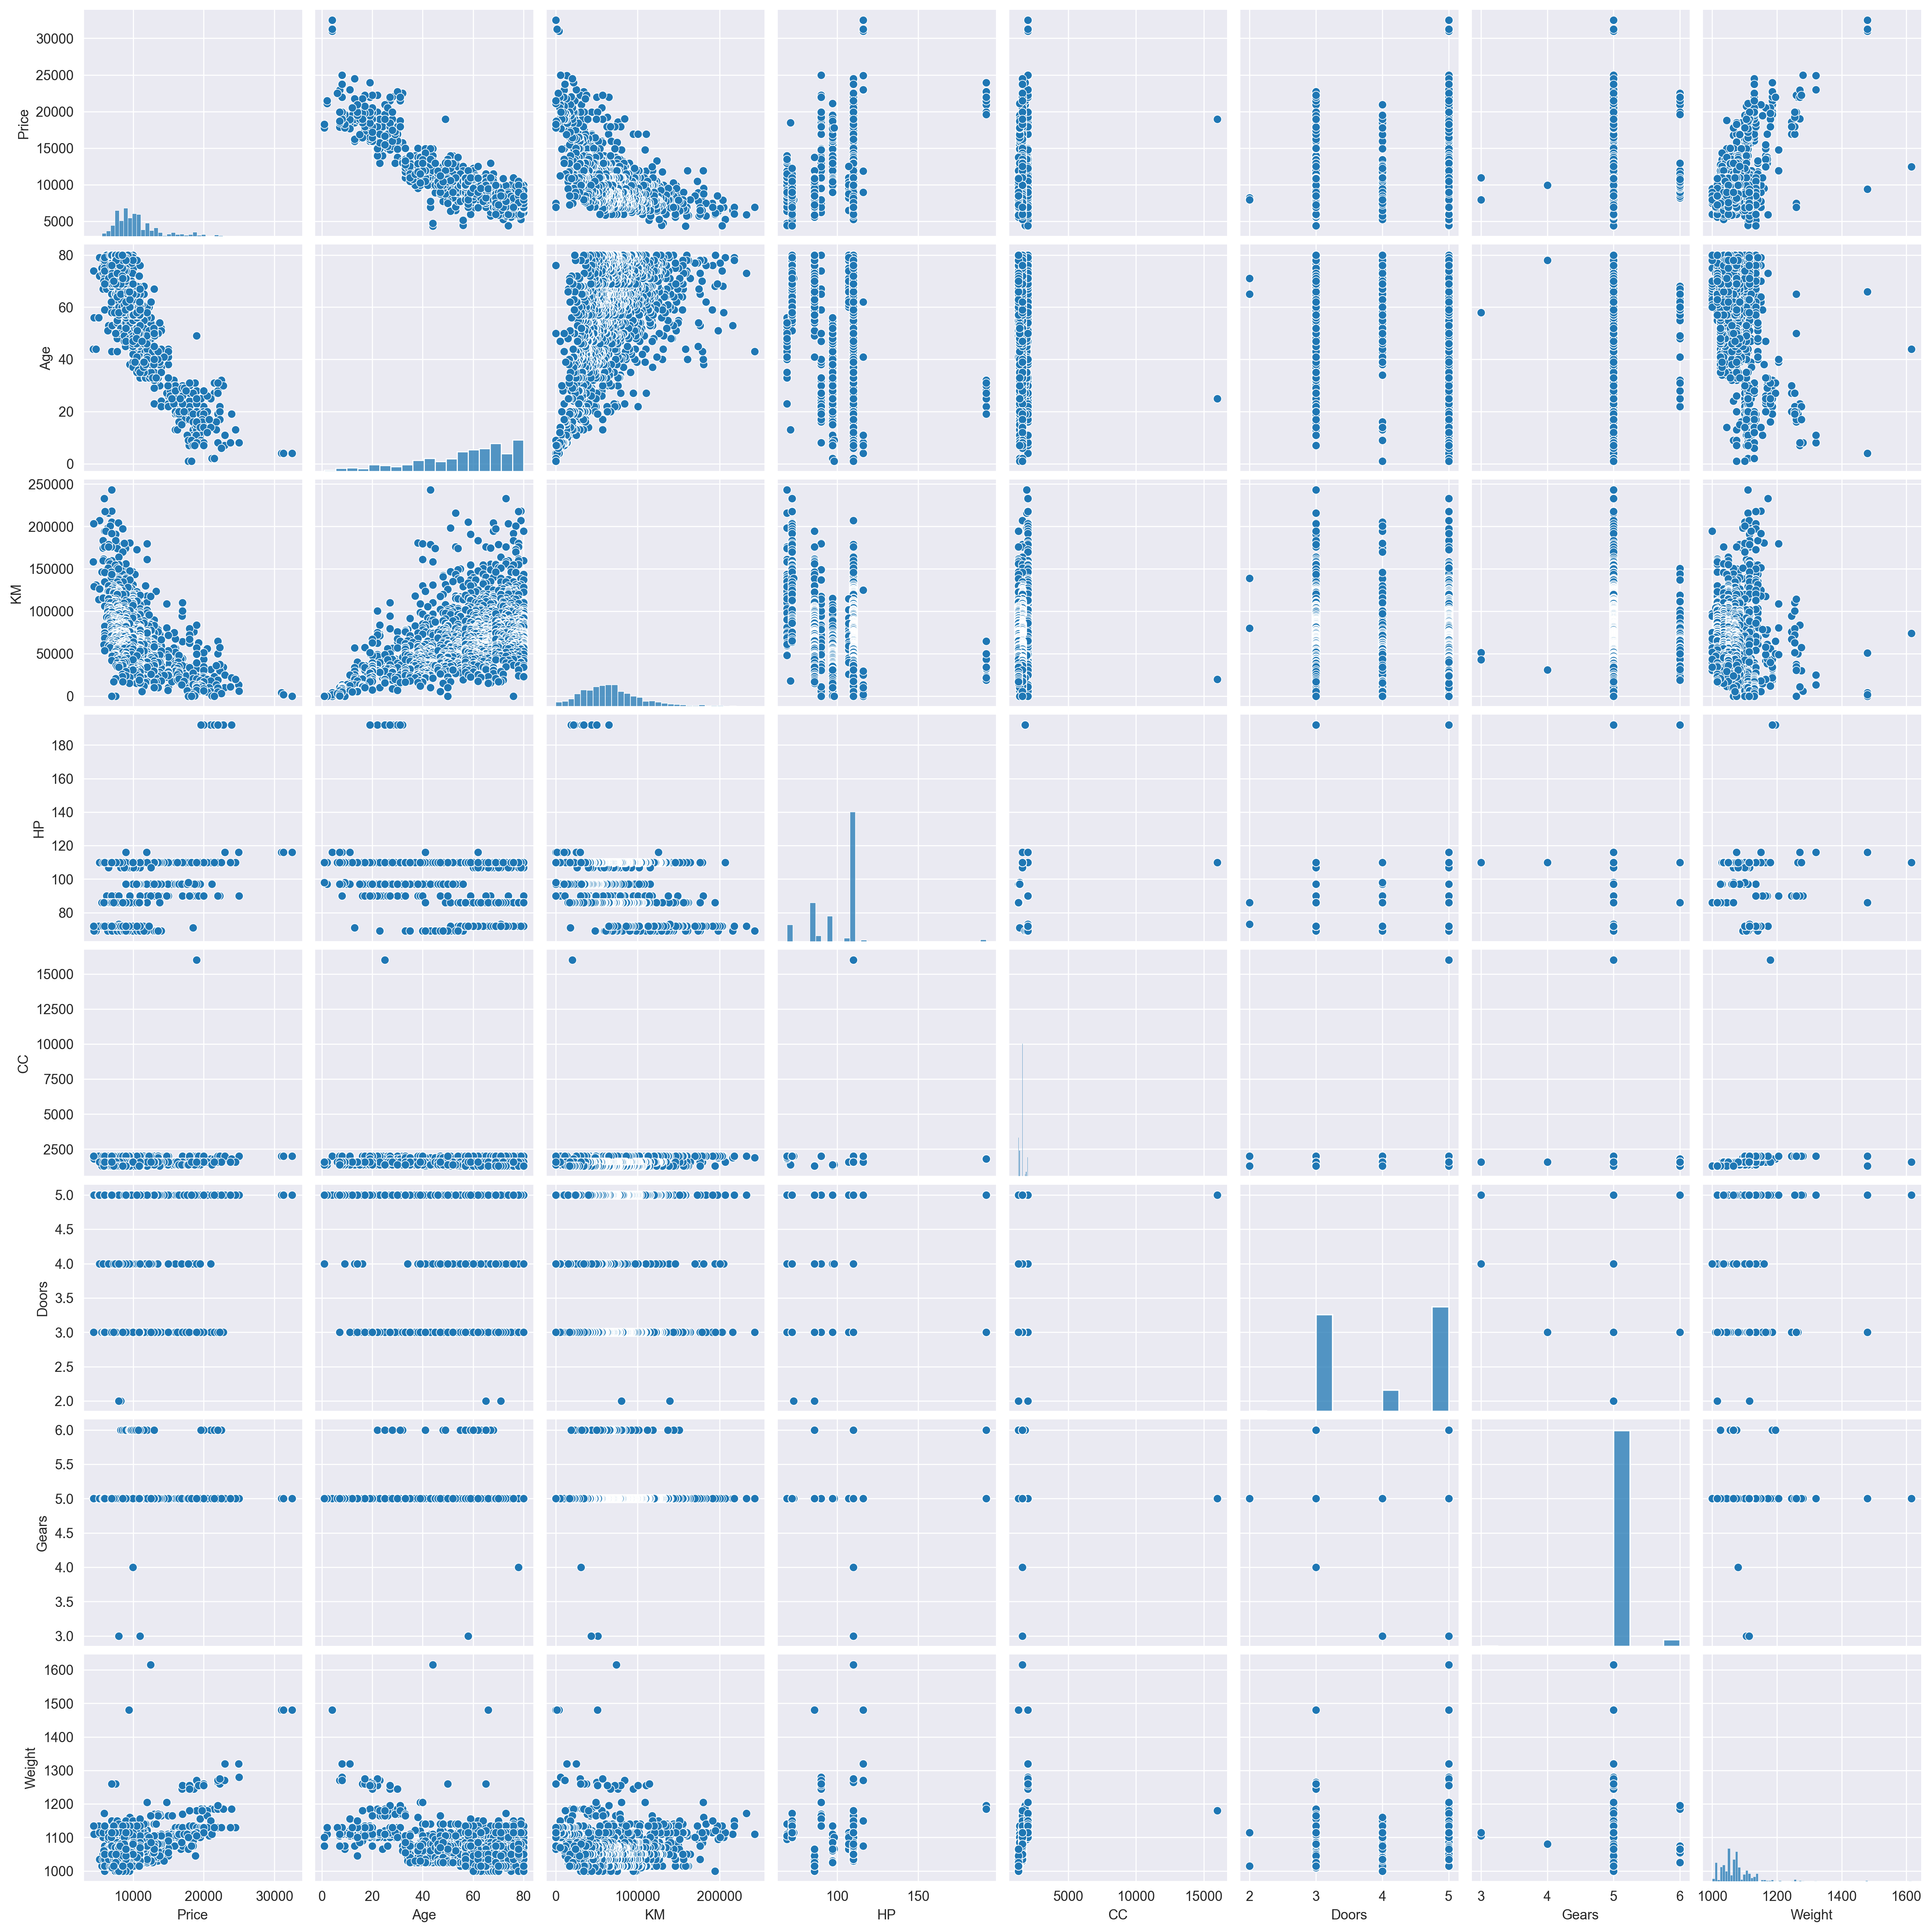

In [13]:
sns.pairplot(df)

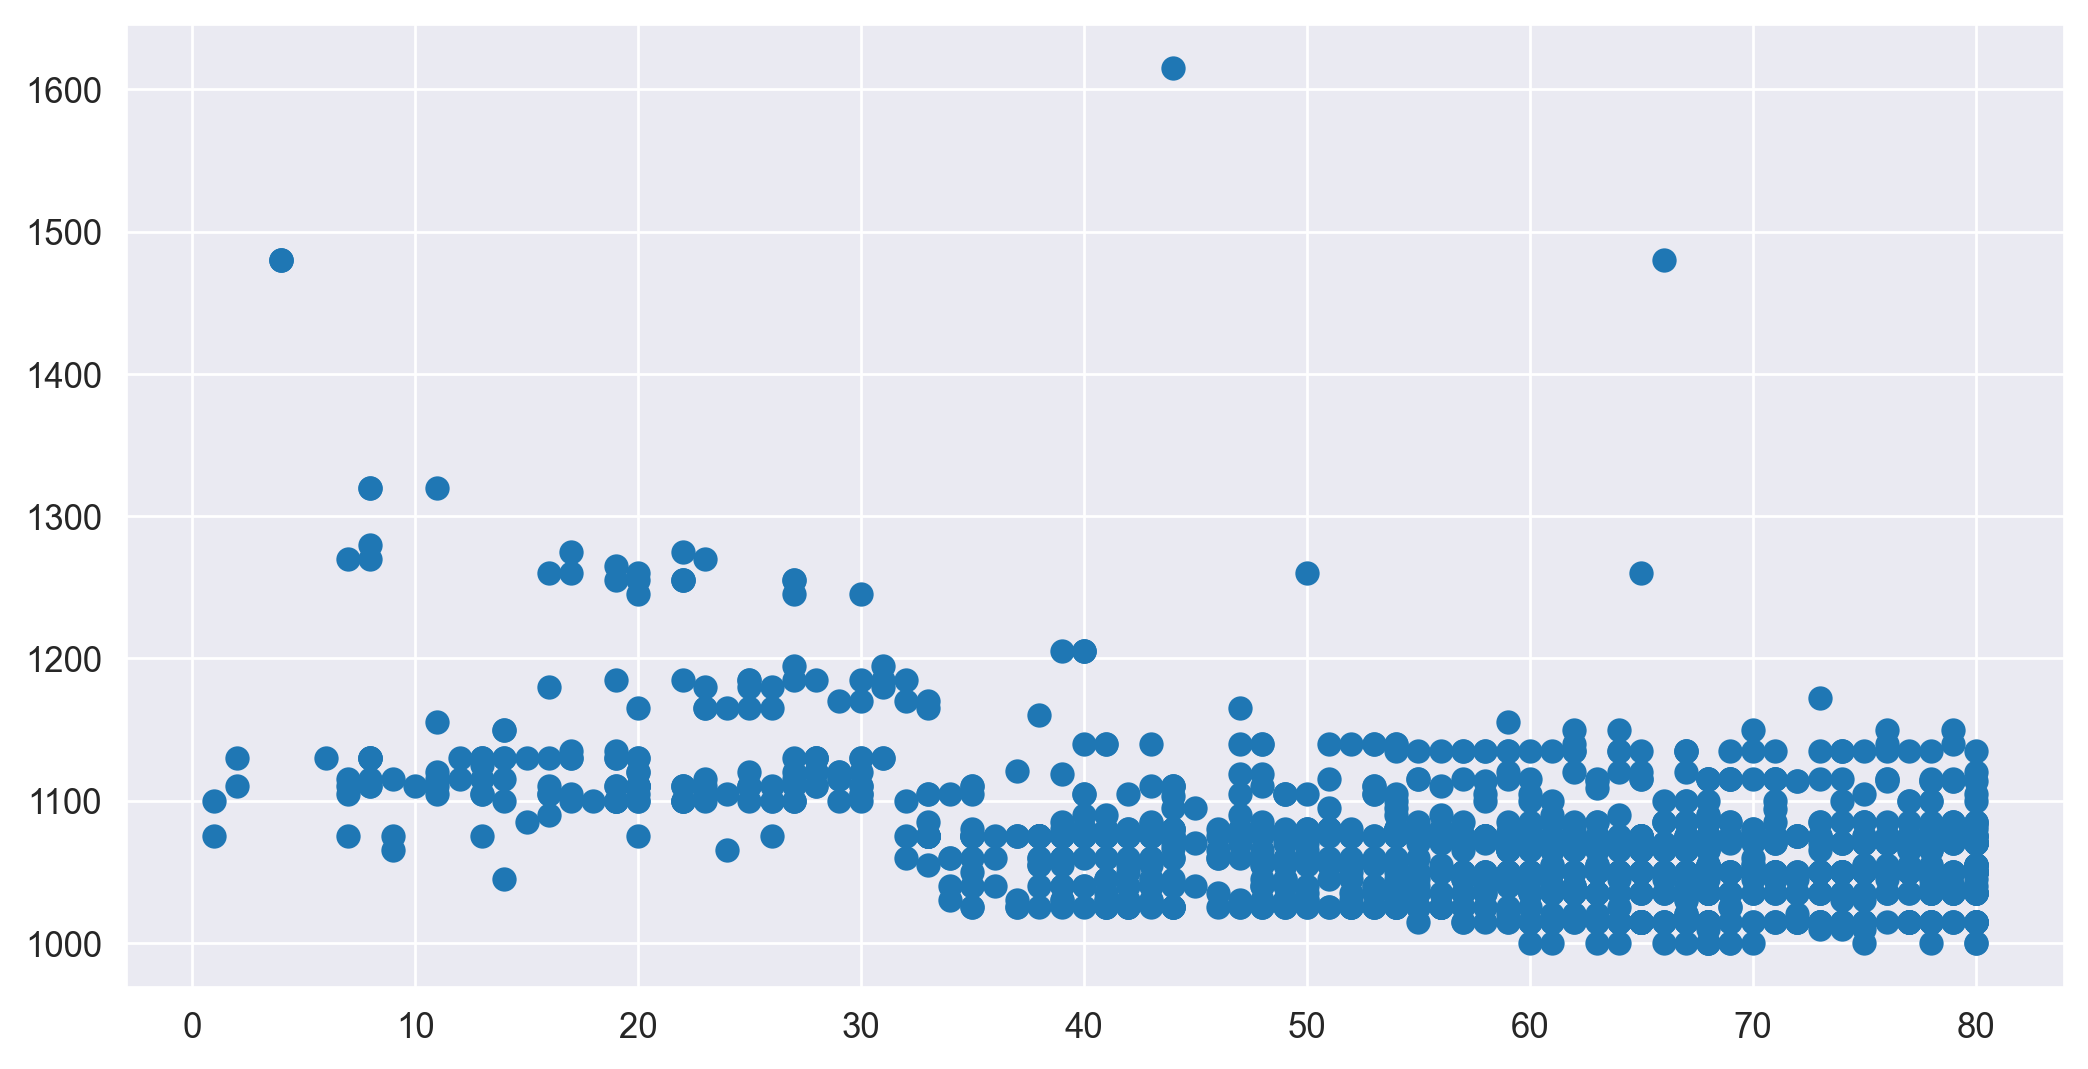

In [14]:
plt.scatter(df['Age'], df['Weight'])

<Axes: >

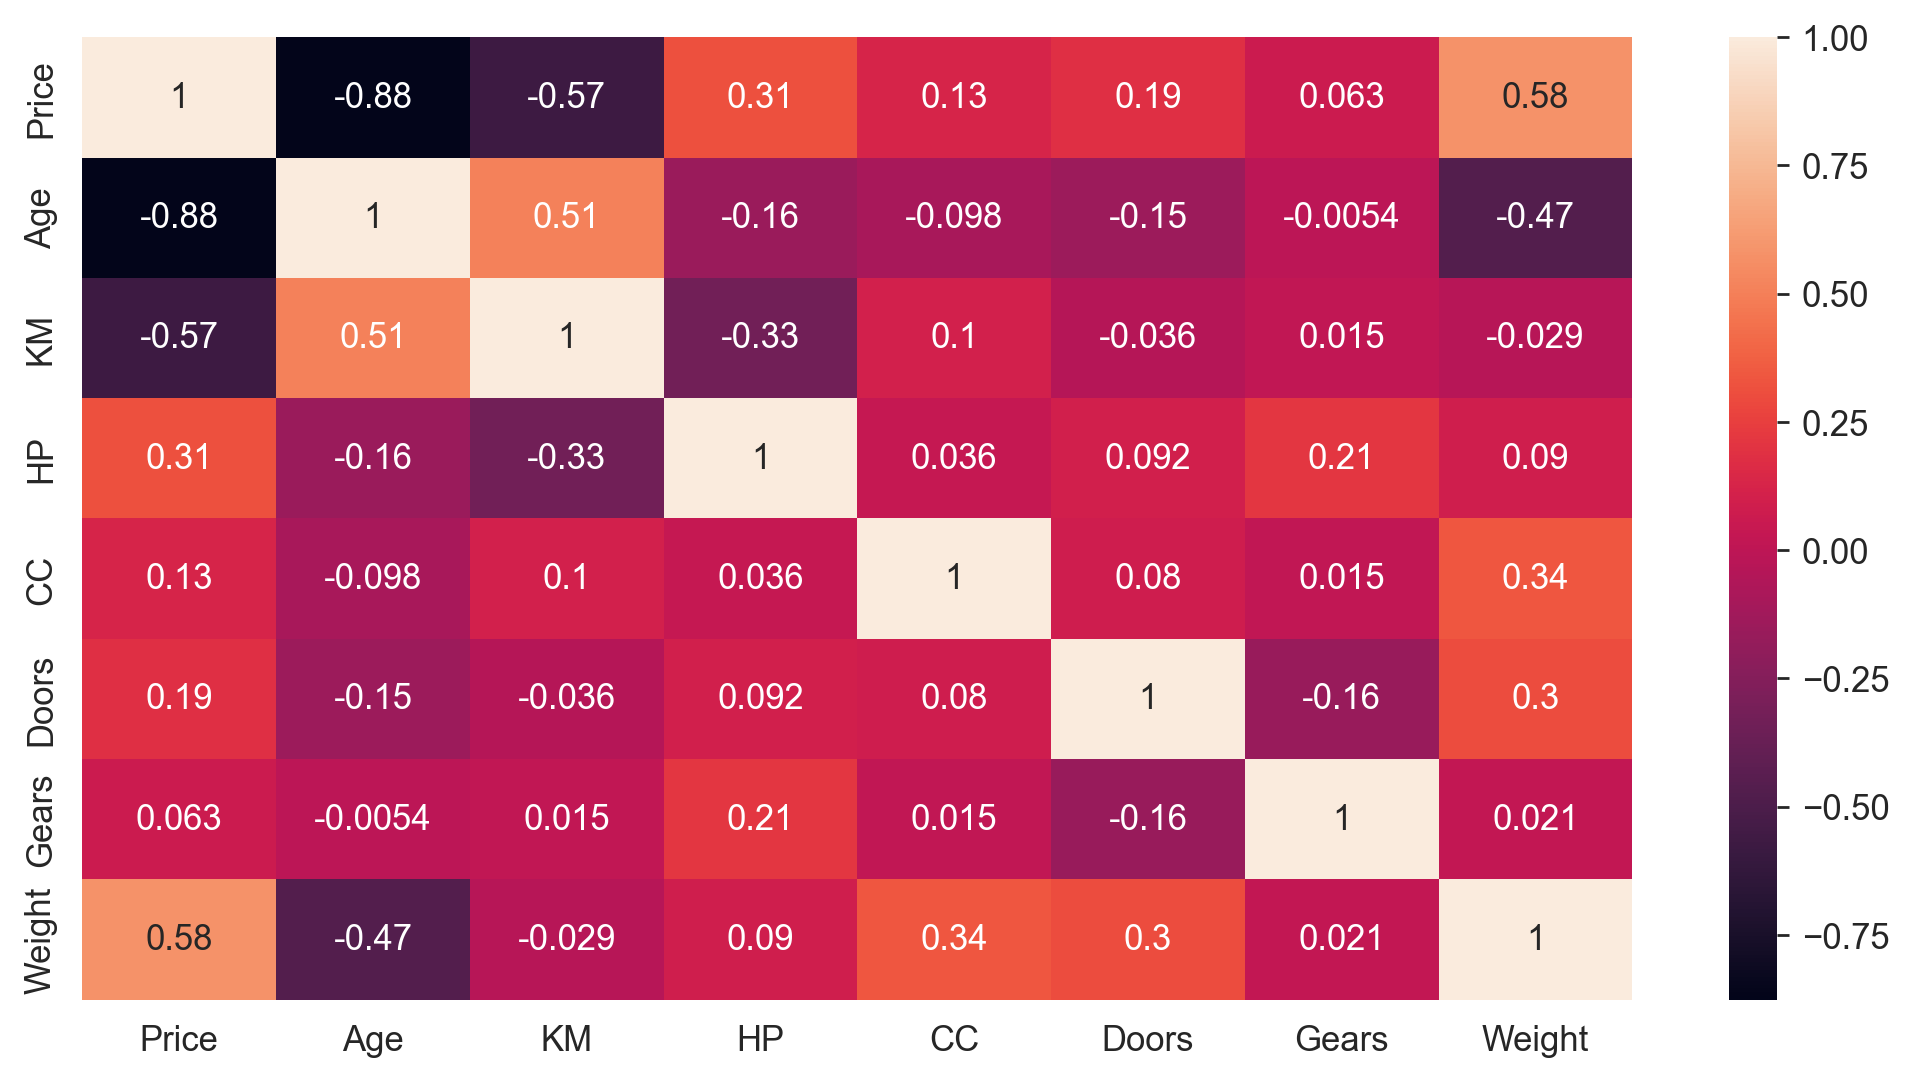

In [15]:
sns.heatmap(df.corr(),annot=True)

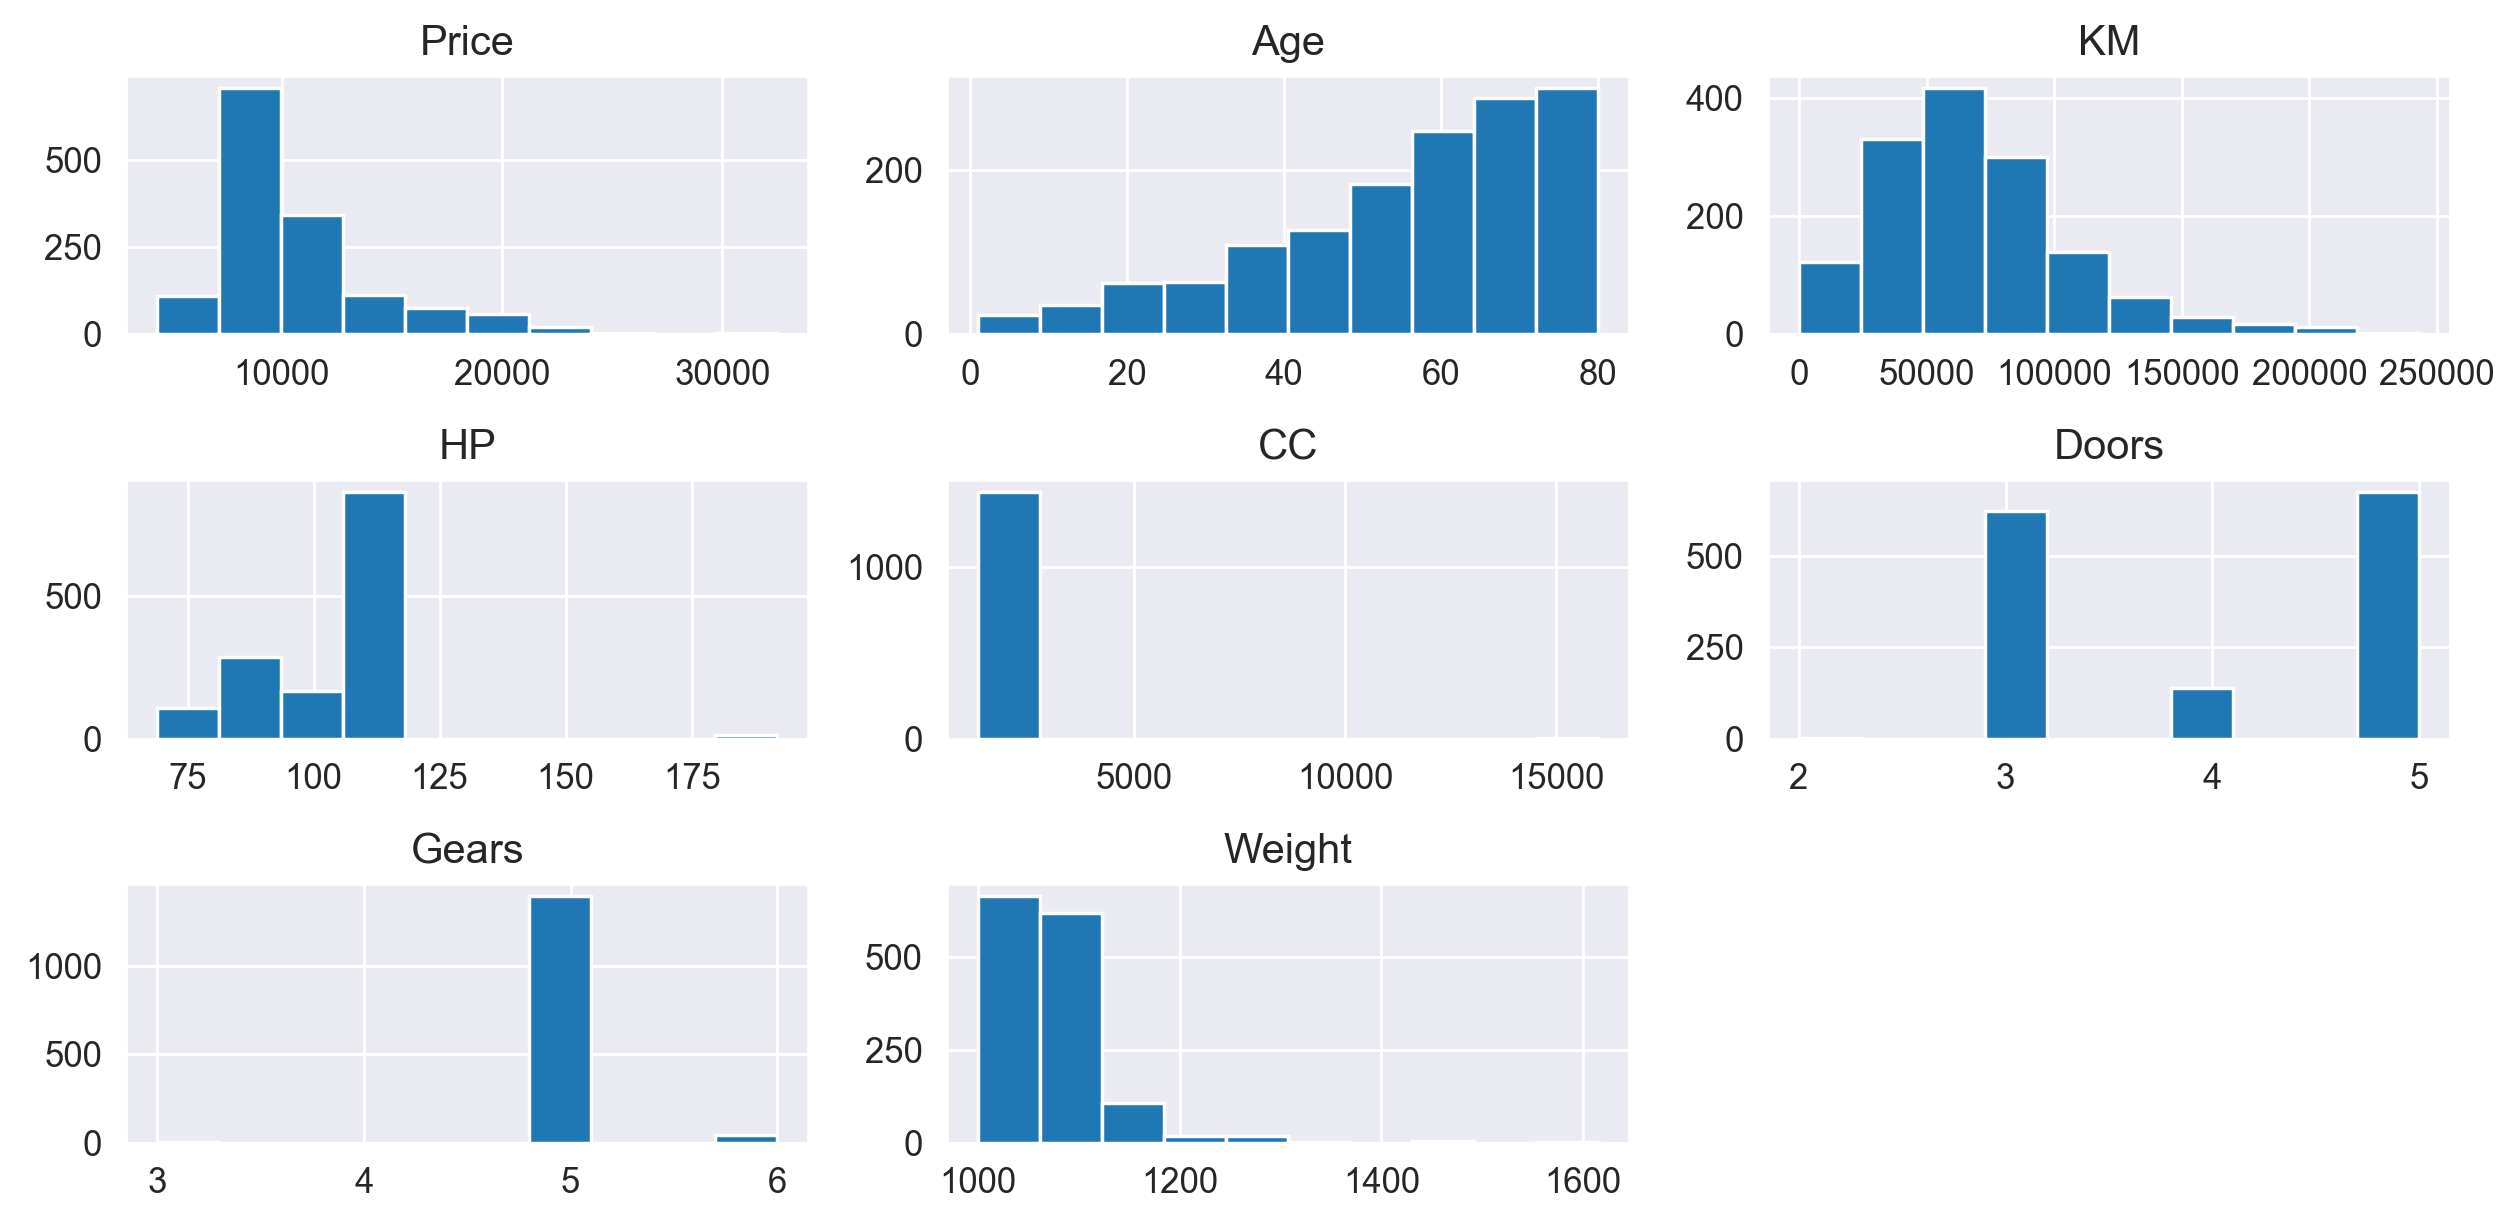

In [16]:
df.hist()
plt.tight_layout()

## Checking and dealing with Duplicates records

In [17]:
df[df.duplicated()]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
113,24950,8,13253,Diesel,116,2000,5,5,1320


In [18]:
df[(df['Price'] == 24950) & (df['KM'] == 13253)]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
112,24950,8,13253,Diesel,116,2000,5,5,1320
113,24950,8,13253,Diesel,116,2000,5,5,1320


In [19]:
df.drop_duplicates(inplace=True)
df

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,2000,3,5,1165
1,13750,23,72937,Diesel,90,2000,3,5,1165
2,13950,24,41711,Diesel,90,2000,3,5,1165
3,14950,26,48000,Diesel,90,2000,3,5,1165
4,13750,30,38500,Diesel,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,5,1025
1432,10845,72,19000,Petrol,86,1300,3,5,1015
1433,8500,71,17016,Petrol,86,1300,3,5,1015
1434,7250,70,16916,Petrol,86,1300,3,5,1015


In [20]:
df[(df['Price'] == 24950) & (df['KM'] == 13253)]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
112,24950,8,13253,Diesel,116,2000,5,5,1320


## Outliers

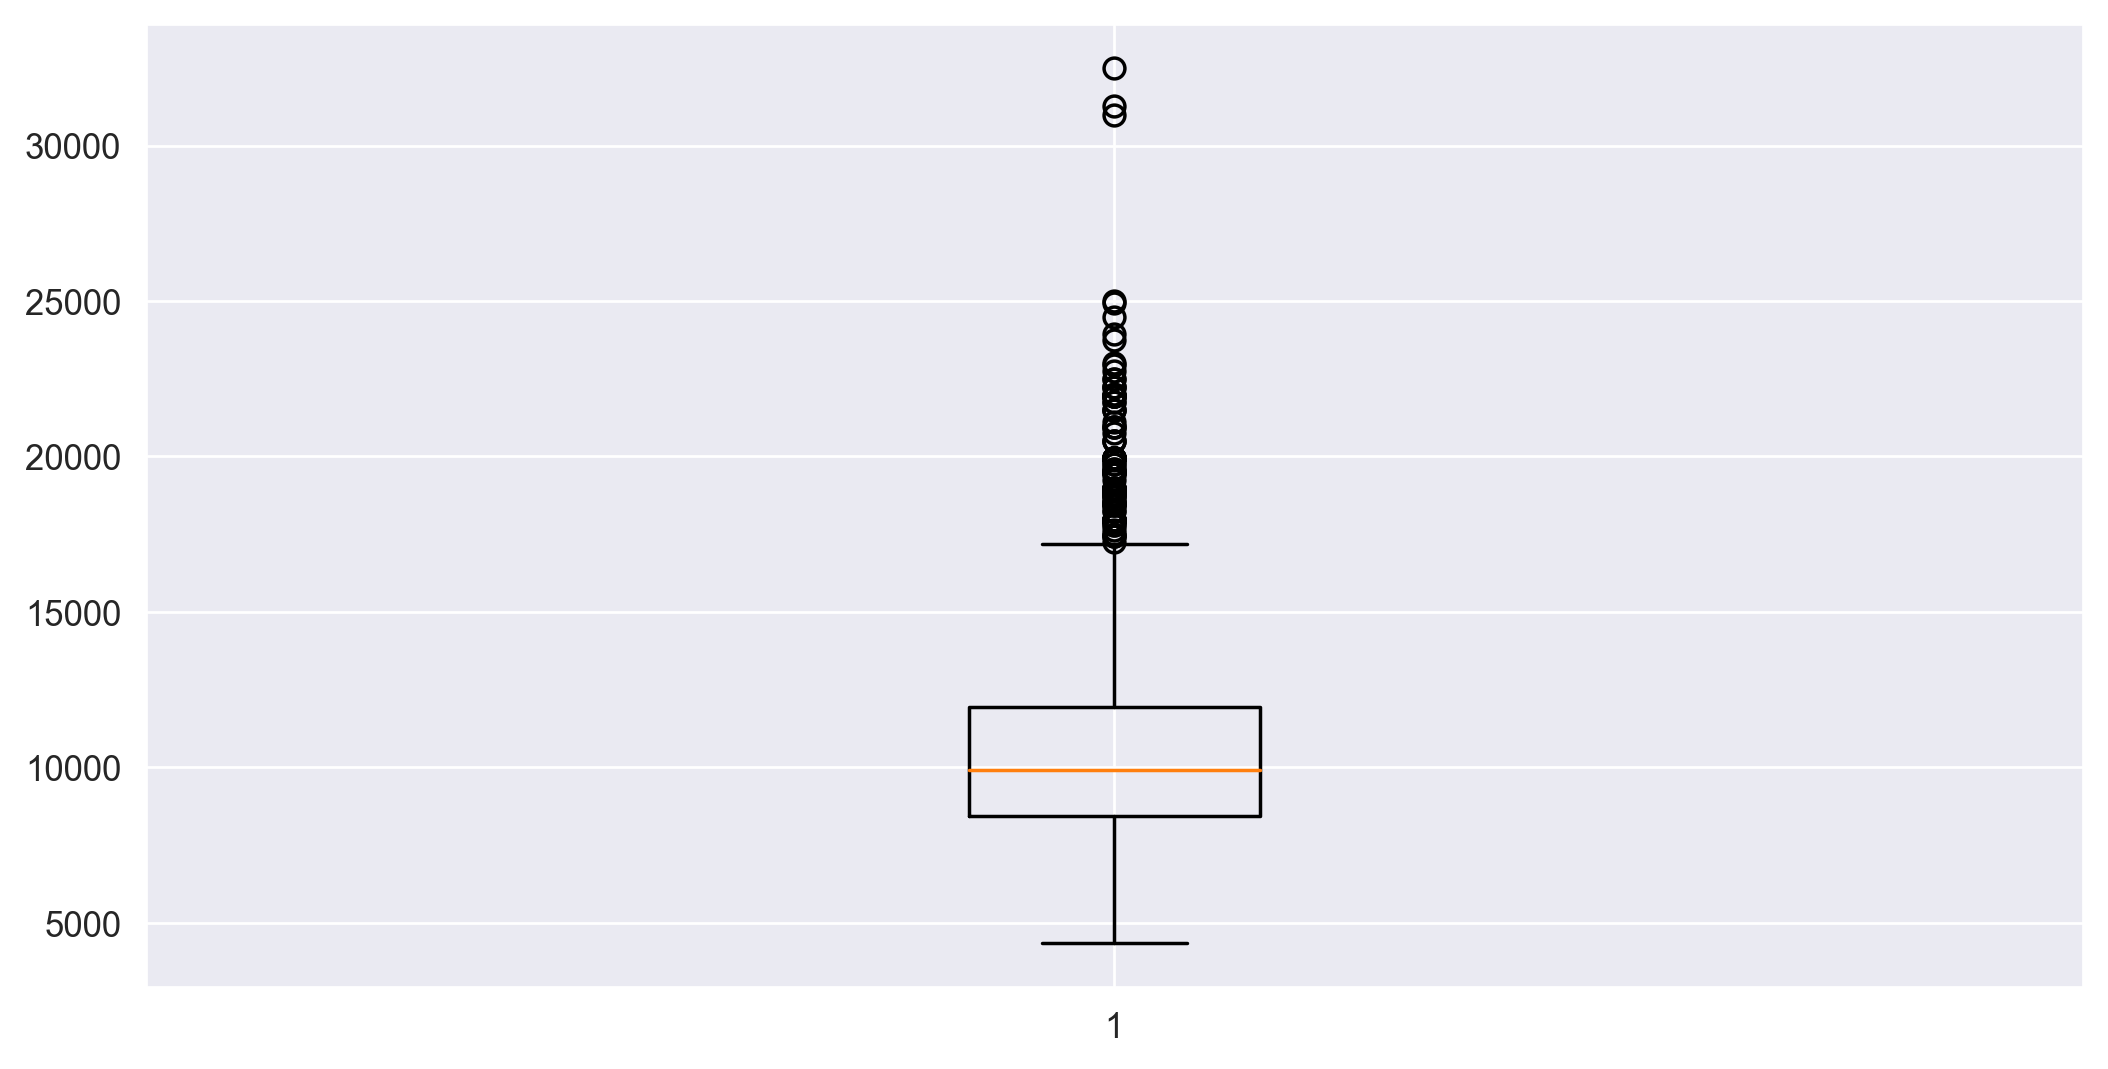

In [21]:
plt.boxplot(df['Price'])
plt.show()

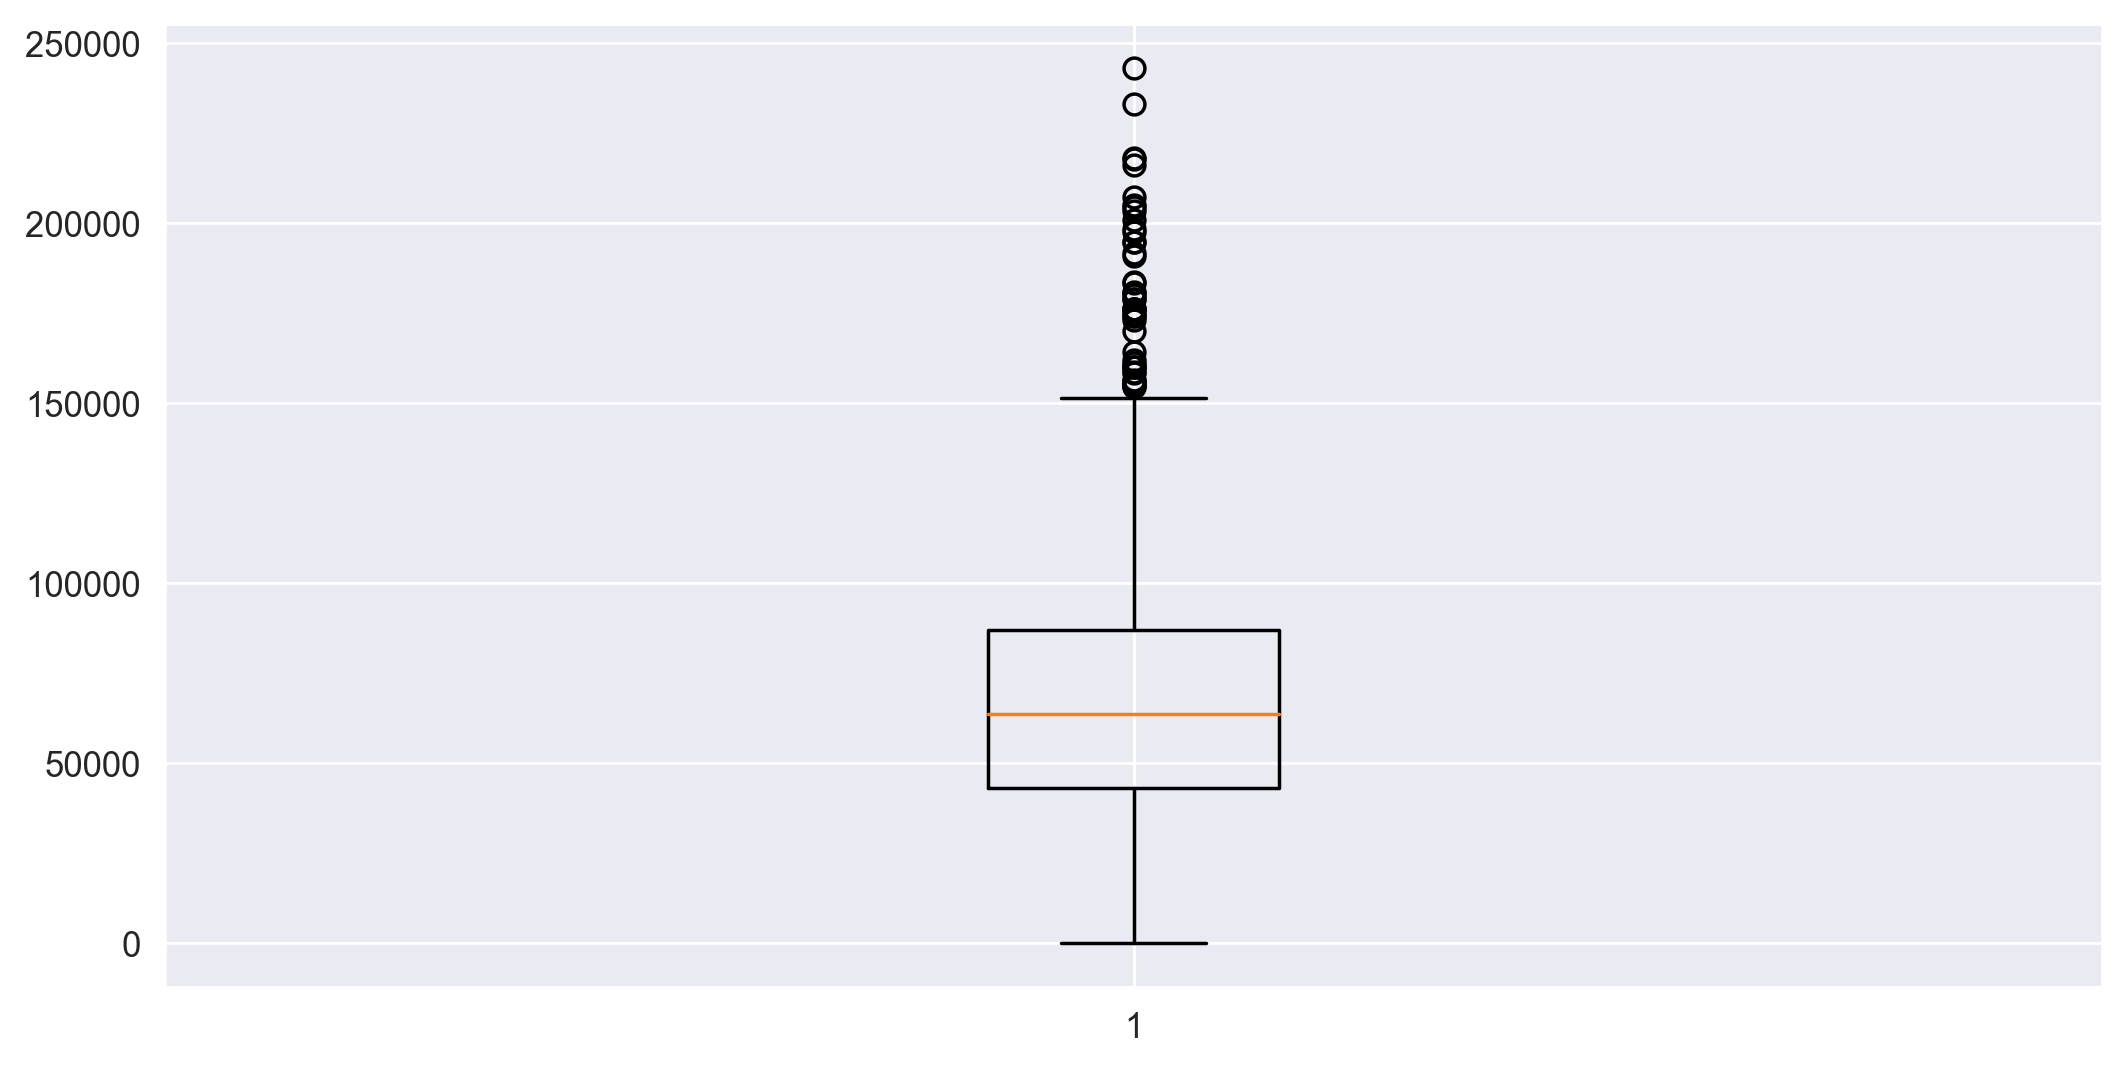

In [22]:
plt.boxplot(df['KM'])
plt.show()

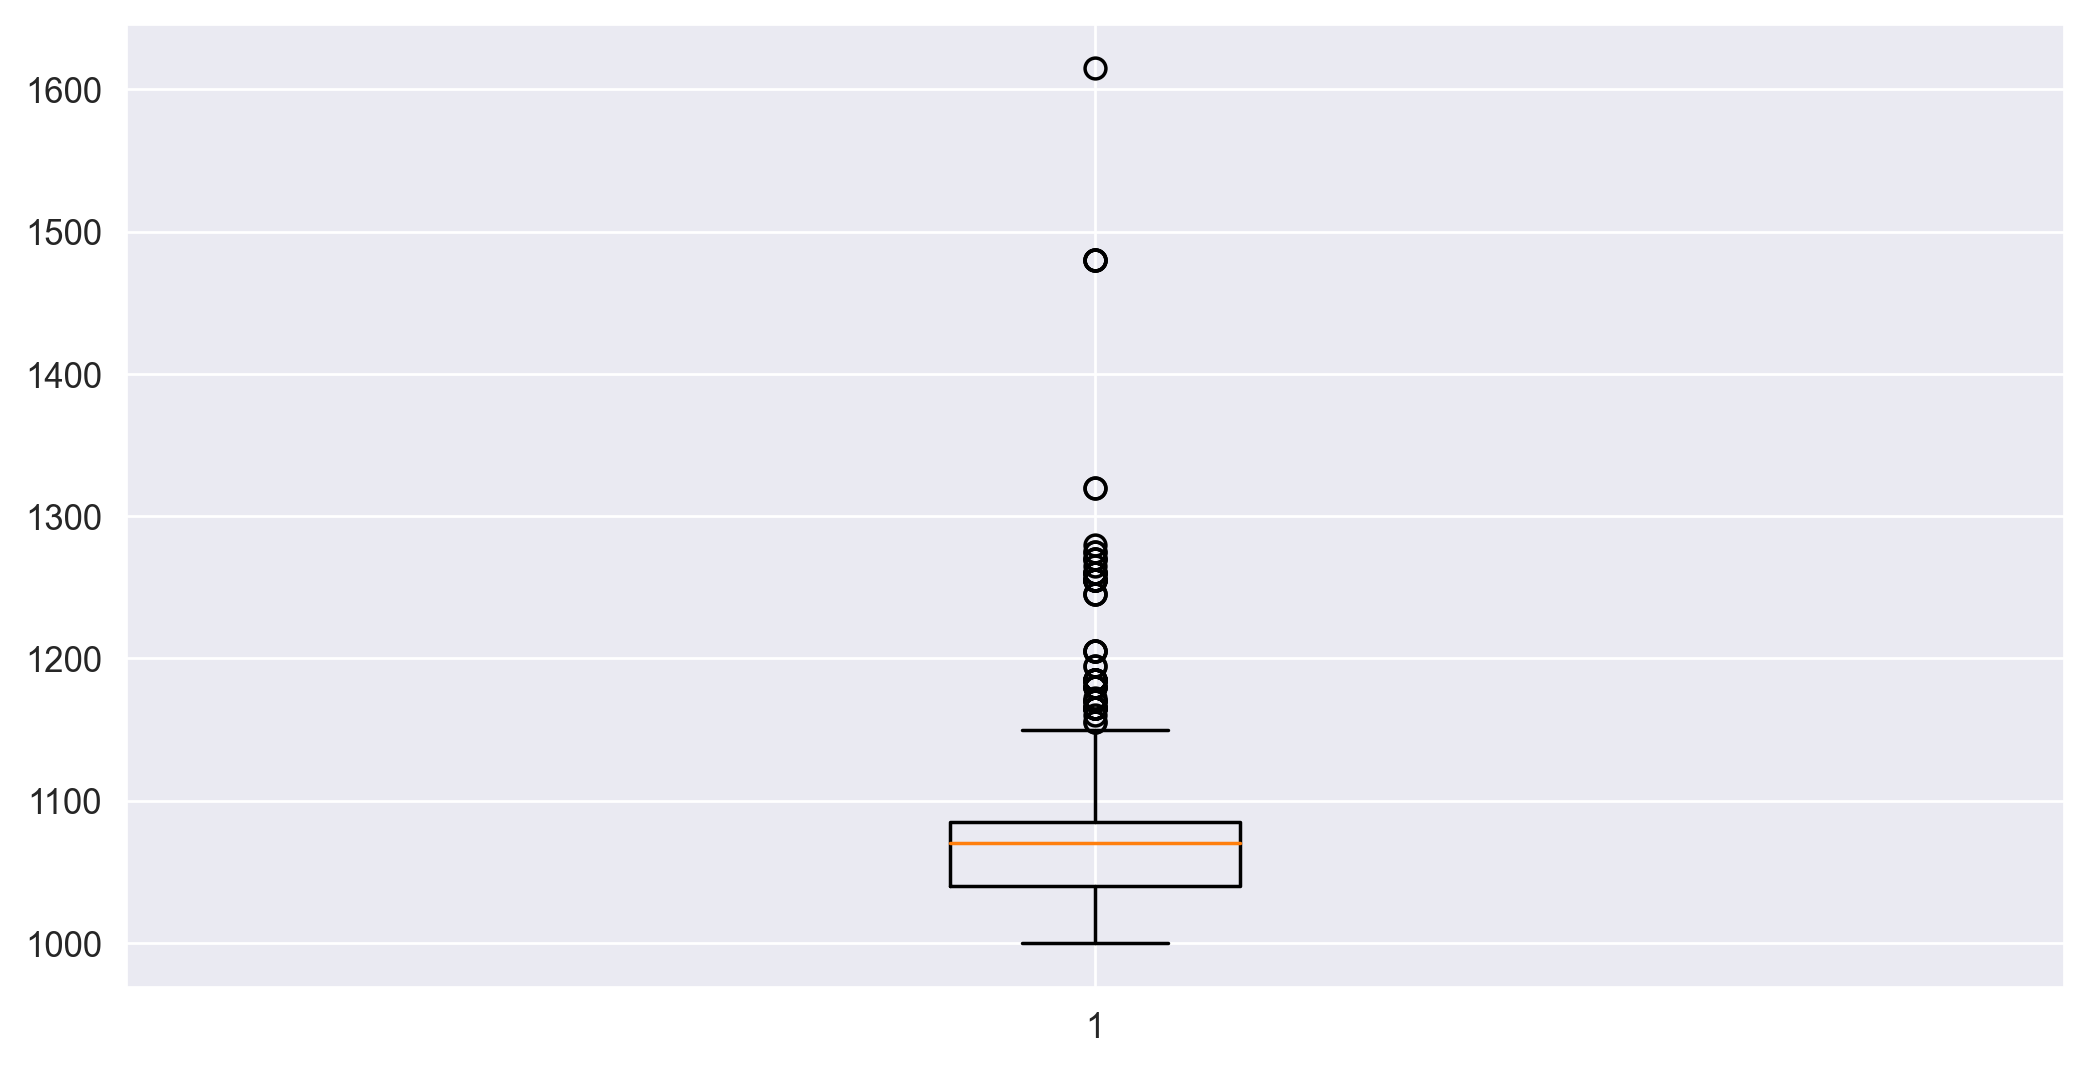

In [23]:
plt.boxplot(df['Weight'])
plt.show()

In [24]:
#Outlier detection function to find lower bound and upper bound 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [25]:
outlier_detection(df, 'Price')

(3200.0, 17200.0)

In [26]:
outlier_detection(df, 'Age')

(5.0, 109.0)

In [27]:
outlier_detection(df, 'KM')

(-23062.25, 153103.75)

In [28]:
outlier_detection(df, 'Weight')

(972.5, 1152.5)

In [29]:
df[df['Price'] > 17200.0]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
7,18600,30,75889,Diesel,90,2000,3,5,1245
8,21500,27,19700,Petrol,192,1800,3,5,1185
10,20950,25,31461,Petrol,192,1800,3,6,1185
11,19950,22,43610,Petrol,192,1800,3,6,1185
12,19600,25,32189,Petrol,192,1800,3,6,1185
...,...,...,...,...,...,...,...,...,...
182,21125,2,225,Petrol,97,1400,5,5,1110
183,21500,2,15,Petrol,110,1600,5,5,1130
184,17795,1,1,Petrol,98,1400,4,5,1100
185,18245,1,1,Petrol,110,1600,5,5,1075


In [30]:
df.loc[df['Price'] > 17200.0,'Price'] = 17200.0

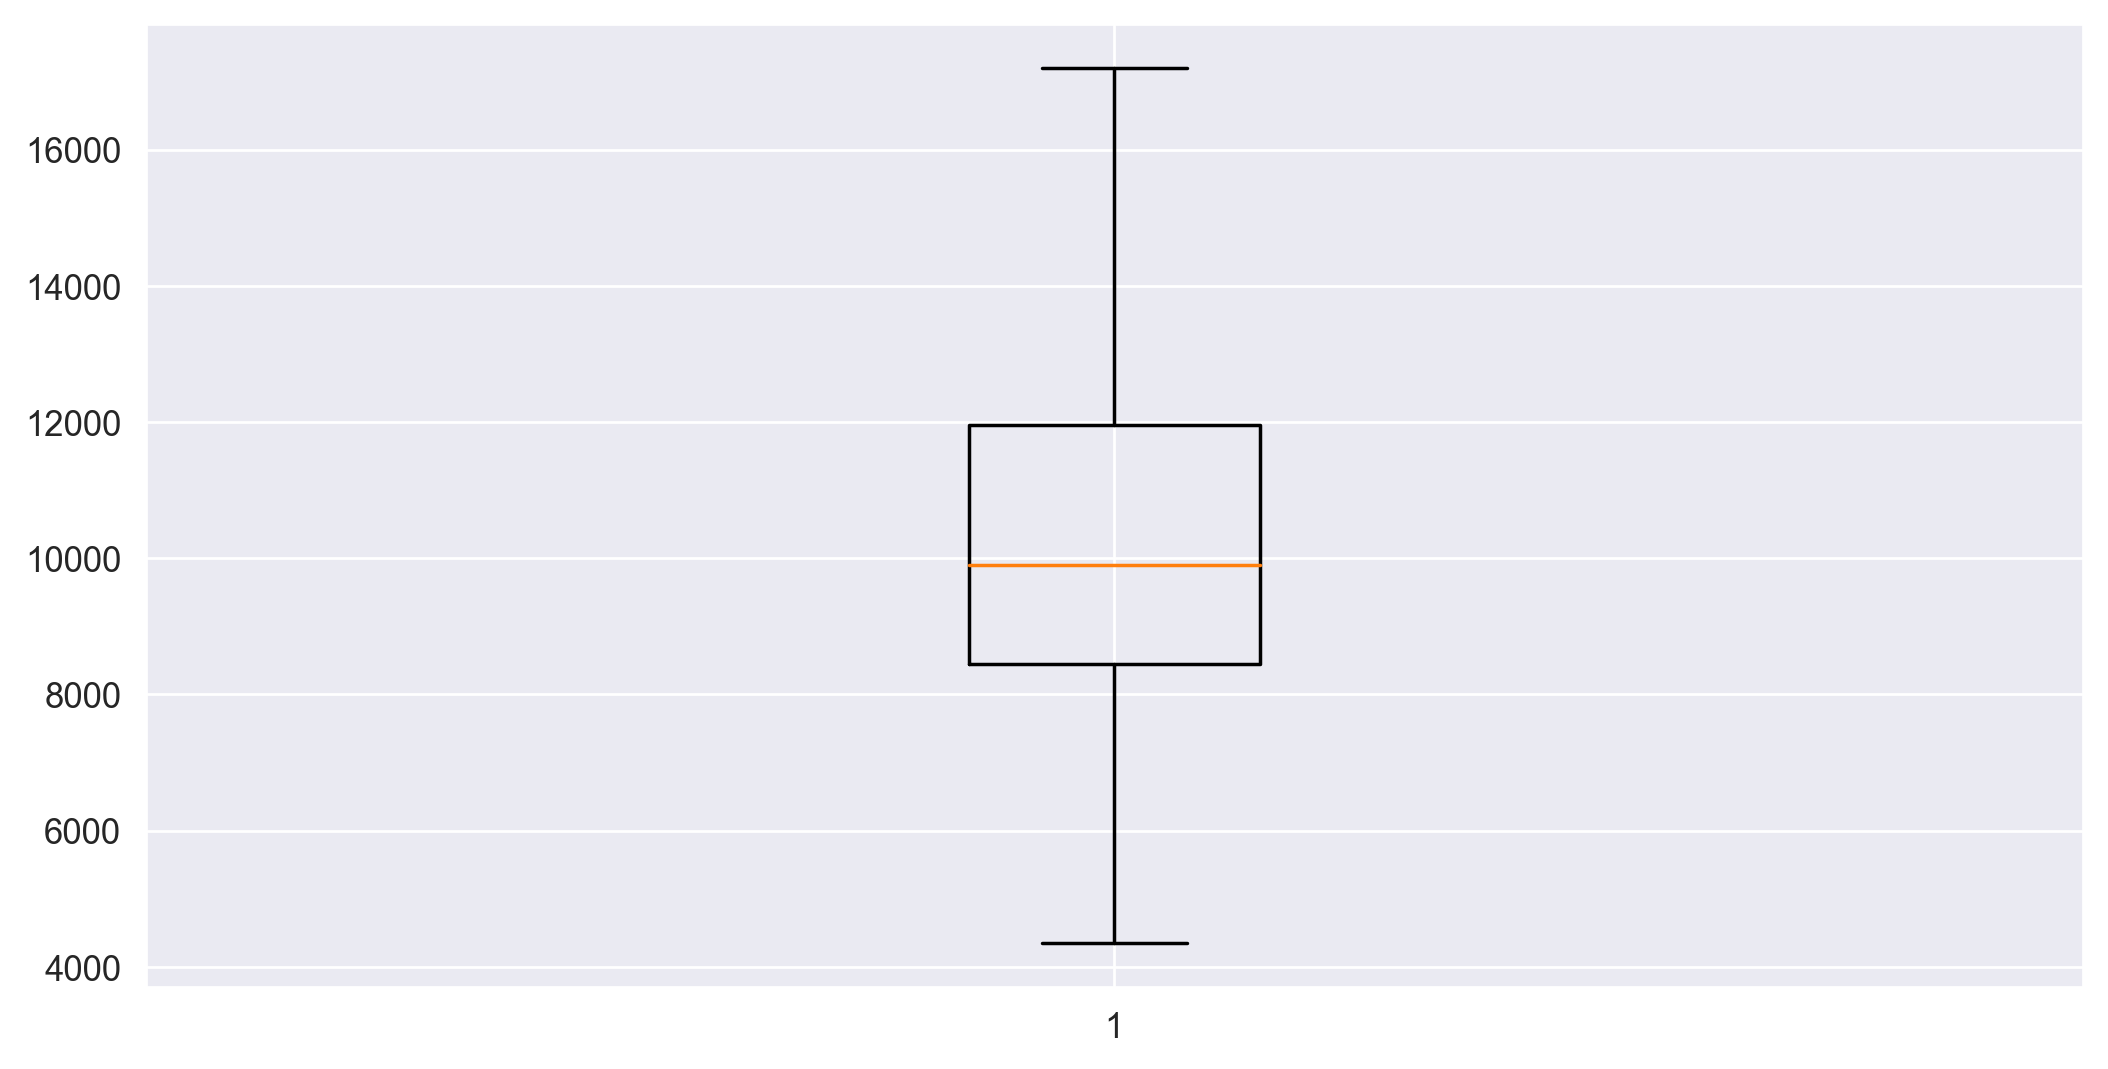

In [31]:
plt.boxplot(df['Price'])
plt.show()

In [32]:
df[df['Weight'] > 1152.5]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,2000,3,5,1165
1,13750,23,72937,Diesel,90,2000,3,5,1165
2,13950,24,41711,Diesel,90,2000,3,5,1165
3,14950,26,48000,Diesel,90,2000,3,5,1165
4,13750,30,38500,Diesel,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
601,7500,50,1,Diesel,90,2000,3,5,1260
654,6950,65,114383,Diesel,90,2000,3,5,1260
768,10950,59,78750,Diesel,90,1975,5,5,1155
960,9390,66,50806,Petrol,86,1300,3,5,1480


In [33]:
df.loc[df['Weight'] > 1152.5,'Weight'] = 1152.5

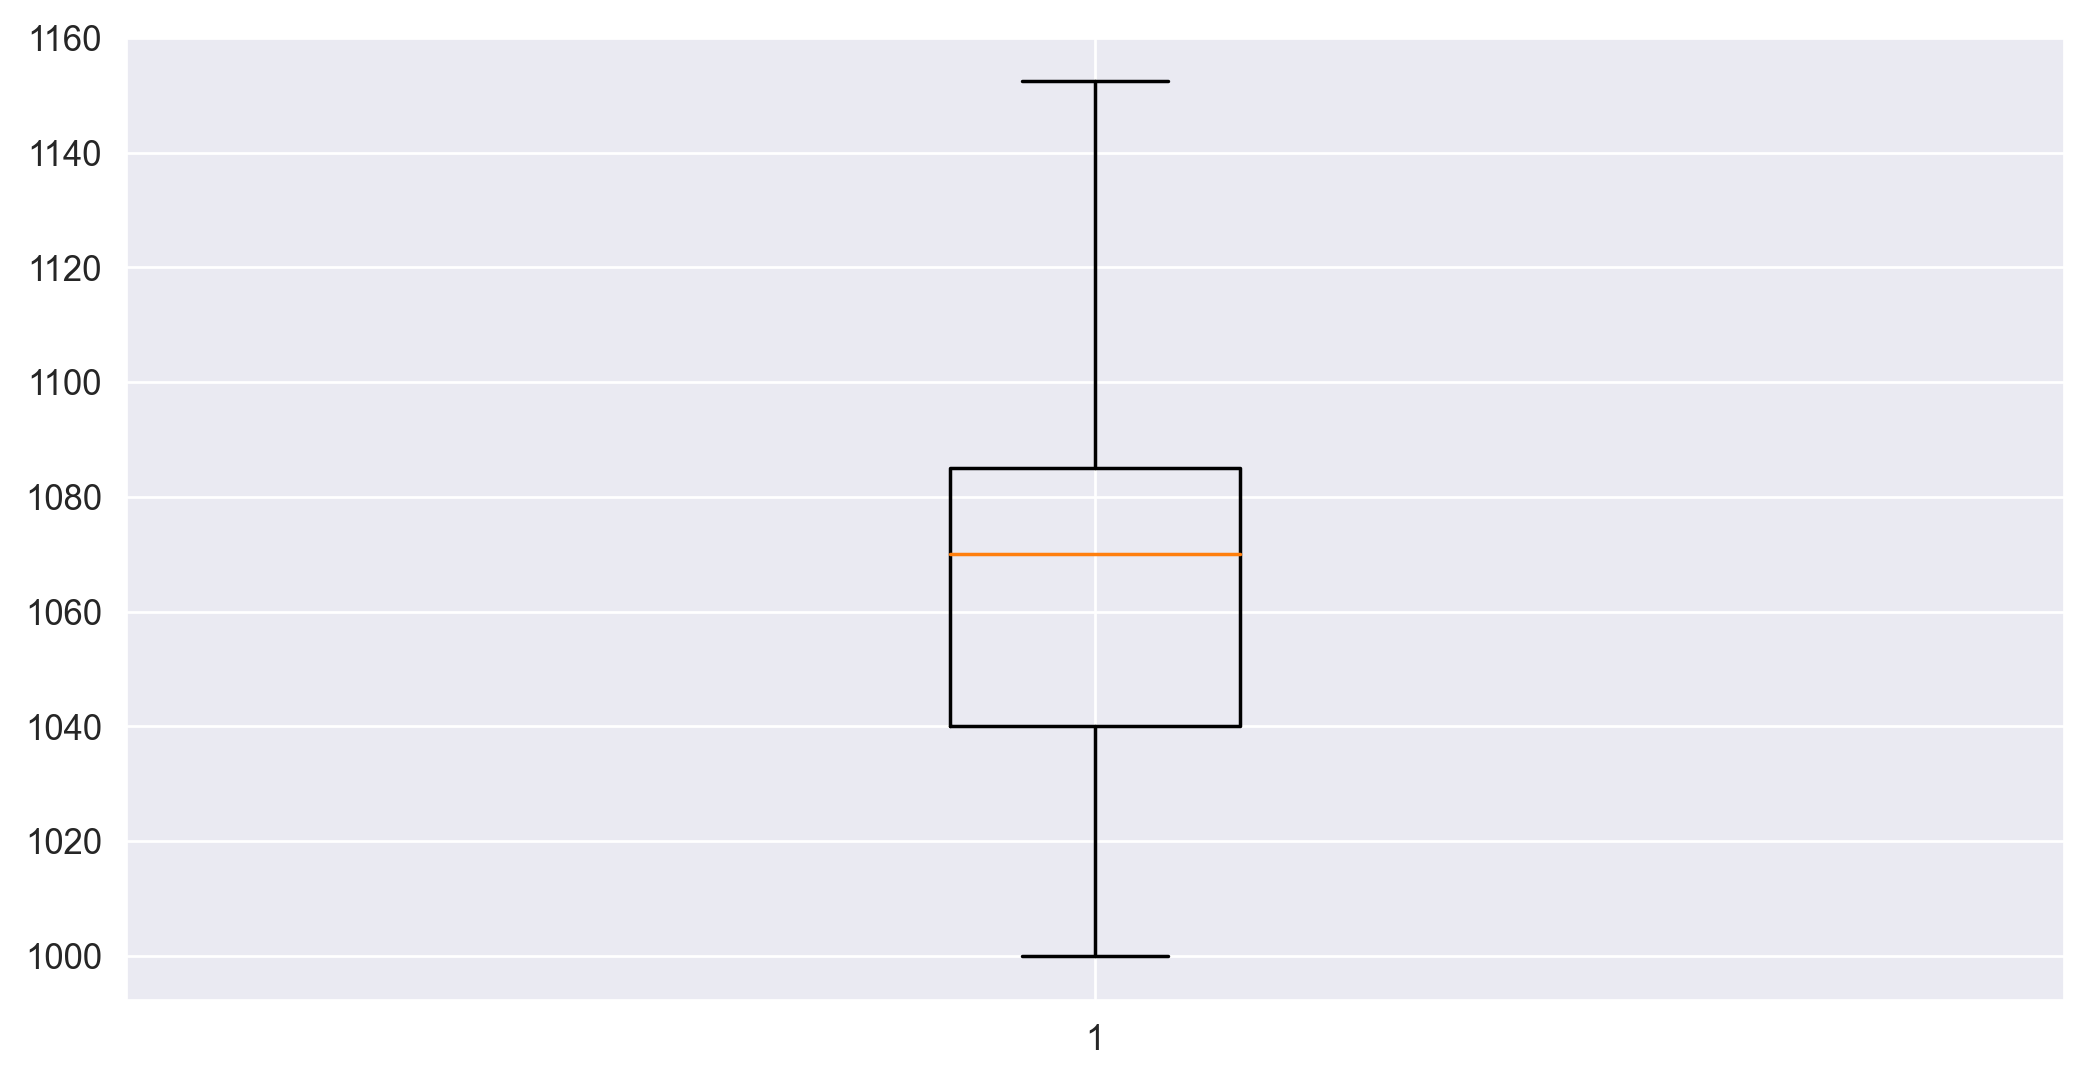

In [34]:
plt.boxplot(df['Weight'])
plt.show()

In [35]:
df[df['KM'] > 153103.75]

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
186,6950,43,243000,Diesel,69,1900,3,5,1110.0
187,9500,38,180638,Diesel,90,2000,4,5,1152.5
188,11950,40,179860,Diesel,90,2000,5,5,1152.5
189,7750,43,178858,CNG,110,1600,3,5,1084.0
190,11950,40,161000,Diesel,69,1900,3,5,1105.0
191,4350,44,158320,Diesel,69,1800,5,5,1110.0
378,6500,53,216000,Diesel,69,1900,3,5,1110.0
379,6400,51,198167,Diesel,69,1900,4,5,1095.0
380,7000,53,176000,Diesel,69,1900,3,5,1105.0
381,7750,54,174139,Diesel,72,2000,4,5,1100.0


In [36]:
df.loc[df['KM'] > 153103.75,'KM'] = 153103.75

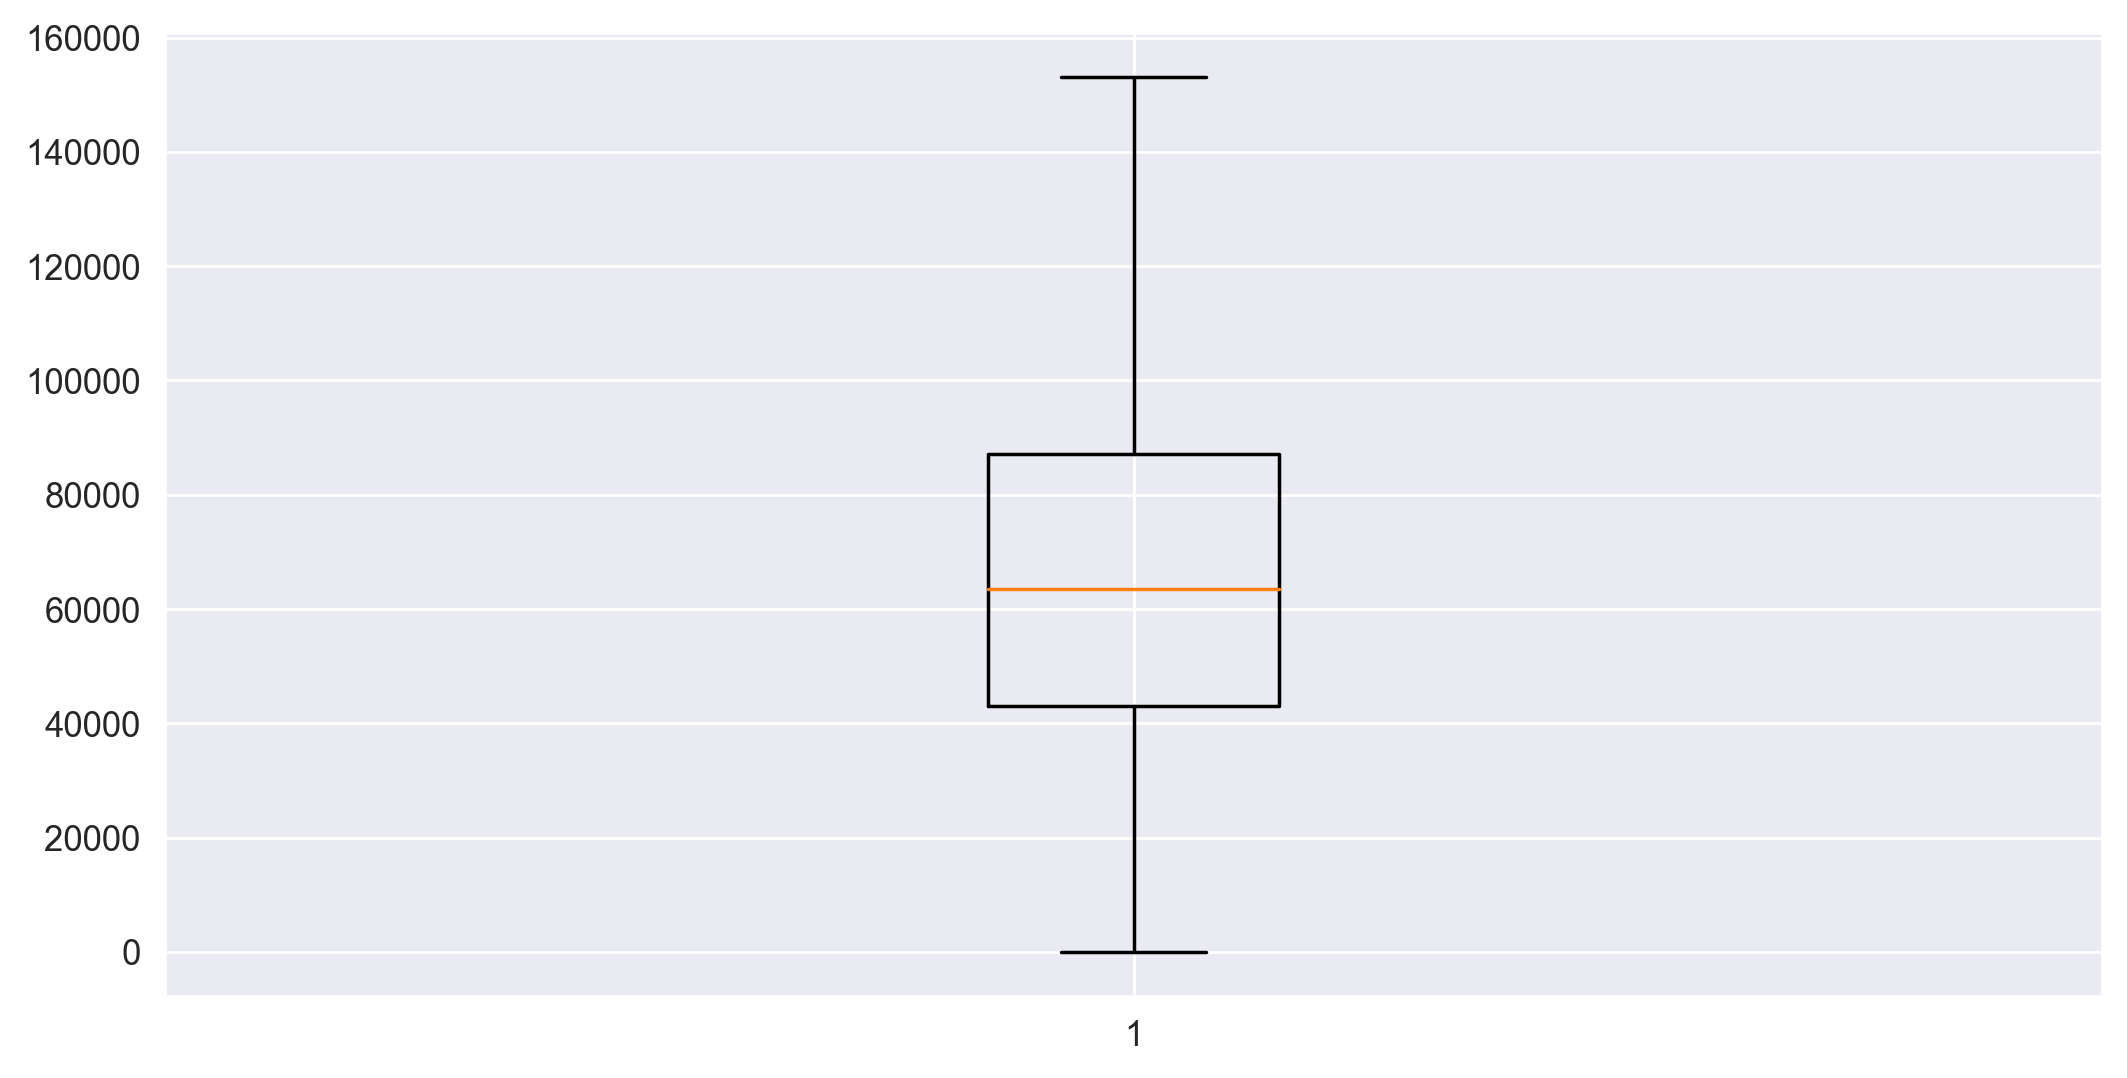

In [37]:
plt.boxplot(df['KM'])
plt.show()

In [38]:
df.head()

,Price,Age,KM,Fuel_Type,HP,CC,Doors,Gears,Weight
0,13500,23,46986.0,Diesel,90,2000,3,5,1152.5
1,13750,23,72937.0,Diesel,90,2000,3,5,1152.5
2,13950,24,41711.0,Diesel,90,2000,3,5,1152.5
3,14950,26,48000.0,Diesel,90,2000,3,5,1152.5
4,13750,30,38500.0,Diesel,90,2000,3,5,1152.5


## Encoding of Fuel column (One Hot Encoding)

In [39]:
df = pd.get_dummies(data=df,columns= ['Fuel_Type'])

## VIF 

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
data = df.drop(columns=['Price'])
data.head()

,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986.0,90,2000,3,5,1152.5,0,1,0
1,23,72937.0,90,2000,3,5,1152.5,0,1,0
2,24,41711.0,90,2000,3,5,1152.5,0,1,0
3,26,48000.0,90,2000,3,5,1152.5,0,1,0
4,30,38500.0,90,2000,3,5,1152.5,0,1,0


In [42]:
data.values

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.4000e+01, 4.1711e+04, 9.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [7.1000e+01, 1.7016e+04, 8.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.0000e+01, 1.6916e+04, 8.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [43]:
vif = pd.DataFrame()
vif

""


In [44]:
vif['Features'] = data.columns
vif

,Features
0,Age
1,KM
2,HP
3,CC
4,Doors
5,Gears
6,Weight
7,Fuel_Type_CNG
8,Fuel_Type_Diesel
9,Fuel_Type_Petrol


In [45]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [46]:
vif

,Features,VIF
0,Age,2.075403
1,KM,1.982906
2,HP,2.286351
3,CC,1.223389
4,Doors,1.374135
5,Gears,1.108277
6,Weight,3.771228
7,Fuel_Type_CNG,38.704992
8,Fuel_Type_Diesel,377.089051
9,Fuel_Type_Petrol,2695.585423


In [47]:
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,2000,3,5,1152.5,0,1,0
1,13750,23,72937.0,90,2000,3,5,1152.5,0,1,0
2,13950,24,41711.0,90,2000,3,5,1152.5,0,1,0
3,14950,26,48000.0,90,2000,3,5,1152.5,0,1,0
4,13750,30,38500.0,90,2000,3,5,1152.5,0,1,0


## Model Building 

In [48]:
X = df.iloc[:,1:]
y = df['Price']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train

,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1128,78,109263.0,110,1600,5,5,1070.0,0,0,1
899,62,59295.0,86,1300,5,5,1035.0,0,0,1
1188,71,90370.0,86,1300,5,5,1035.0,0,0,1
311,44,38461.0,110,1600,5,5,1080.0,0,0,1
1145,75,101855.0,110,1600,5,5,1070.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1096,75,125400.0,110,1600,3,5,1050.0,0,0,1
1131,75,107000.0,110,1600,3,5,1050.0,0,0,1
1295,80,71500.0,110,1600,4,5,1035.0,0,0,1
861,65,64630.0,110,1600,5,5,1070.0,0,0,1


## Scaling the data for beter result

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_test

array([[ 0.170362  ,  0.35284091,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 0.33084524, -0.09746627,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 0.170362  ,  1.78070036, -1.96065613, ..., -0.10702217,
         2.84800125, -2.69425181],
       ...,
       [ 0.86578936, -1.21501041, -1.02918509, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [-1.11350391, -0.78293674,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 1.29374467,  1.20460214,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056]])

In [55]:
X_train

array([[ 1.18675584,  1.18337292,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 0.33084524, -0.25595089, -1.02918509, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 0.81229495,  0.63916173, -1.02918509, ..., -0.10702217,
        -0.35112344,  0.37116056],
       ...,
       [ 1.29374467,  0.09561305,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 0.49132847, -0.10227669,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056],
       [ 1.0262726 ,  1.19135188,  0.56762241, ..., -0.10702217,
        -0.35112344,  0.37116056]])

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# predicting for testing data
y_pred = model.predict(X_test)

In [59]:
y_pred

array([10568.84673017, 10131.96187738,  9225.03962696,  9348.87592148,
        8813.10482897,  8786.86882111,  8305.65476106,  8370.68665912,
       11580.62420476, 12129.44146658,  9388.44654478,  9318.95438153,
       12657.21817109, 12018.17822272,  8941.02845426, 11394.19080341,
       12064.76364365, 14025.38733365, 10176.57047865, 11340.28441522,
       11247.16245648, 17290.1166848 ,  9697.07043179, 10388.66521511,
        7822.2343919 , 15264.4623987 ,  7578.83988544,  8381.61784771,
       15105.00810303, 13302.50359058,  8251.32365603, 10274.83125692,
        9917.7608212 ,  9987.69449192,  9932.06712442,  8614.51678891,
        8739.40955081,  9868.94009183, 15729.02022255, 10480.77447278,
        9013.49543519,  9470.95663203, 10064.6963033 ,  8575.10626877,
       10365.42815474, 16687.14746298, 10338.90960751,  9012.72495421,
       10398.37478089, 11971.16462684, 12551.2264601 ,  6903.76656812,
       14450.83528633, 15656.35237166,  6648.71038709,  7818.51310528,
      

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1253447.682248443
R-squared: 0.8530241650455501


In [62]:
# Model coefficients 
print("Coefficients:", model.coef_)

# Intercept 
print("Intercept:", model.intercept_)

Coefficients: [-2002.86021832  -547.75196436    50.34651174     4.87478138
   -95.84344058    69.9028816    886.18518203   -19.69977148
  -253.17779796   248.9855043 ]
Intercept: 10489.903310104532


In [63]:
# Get training score (R² score for the training set)
train_score = model.score(X_train, y_train)

# Get test score (R² score for the test set)
test_score = model.score(X_test, y_test)

print(f"Training R-squared: {train_score}")
print(f"Test R-squared: {test_score}")

Training R-squared: 0.8674807759971964
Test R-squared: 0.8530241650455501


## Checking for Influencial data point

In [64]:
import statsmodels.formula.api as smf
model_stats = smf.ols('Price~Age+KM+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol+HP+CC+Doors+Gears+Weight',data=df).fit()

In [65]:
#Find the influence data
inf = model_stats.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

<StemContainer object of 3 artists>

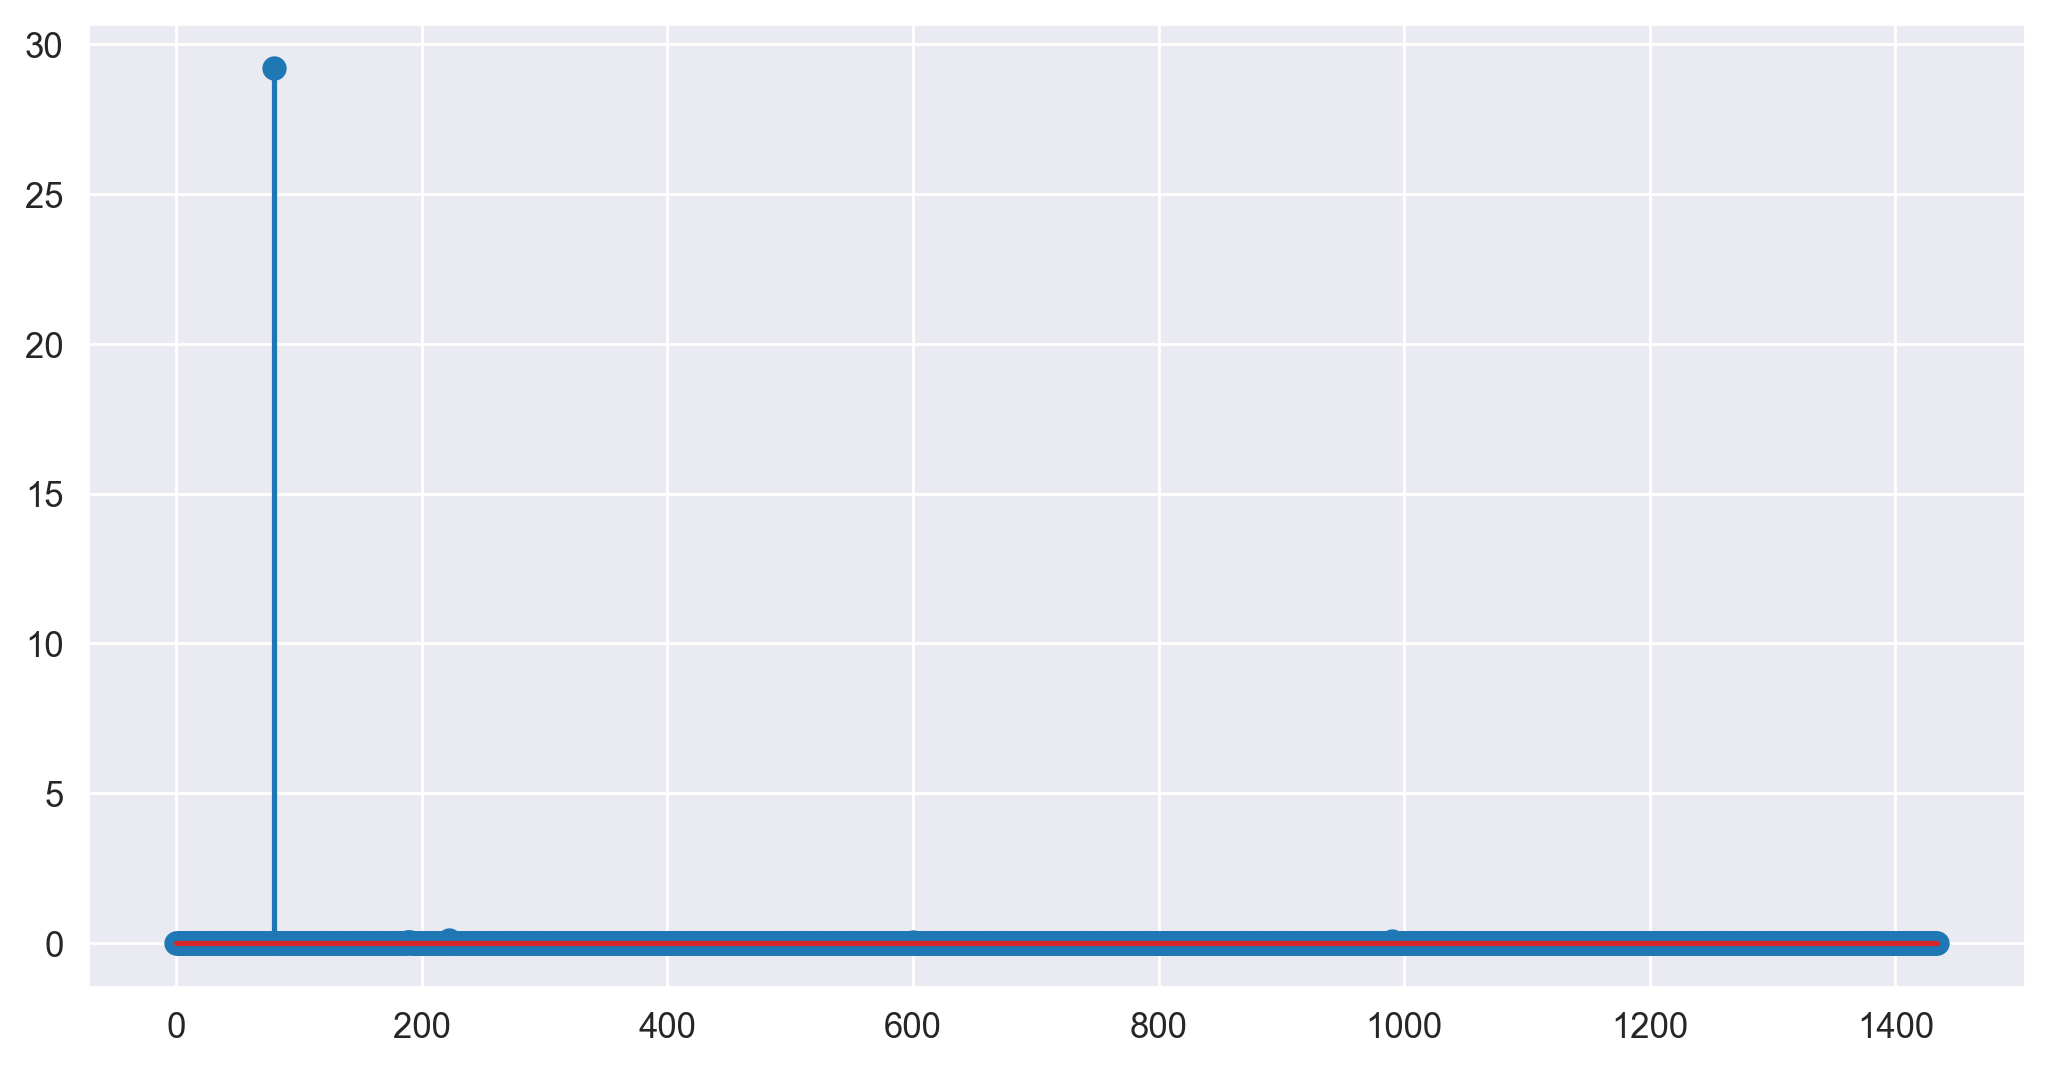

In [66]:
plt.stem(c)

In [67]:
np.argmax(c), np.max(c)

(80, 29.212681255288636)

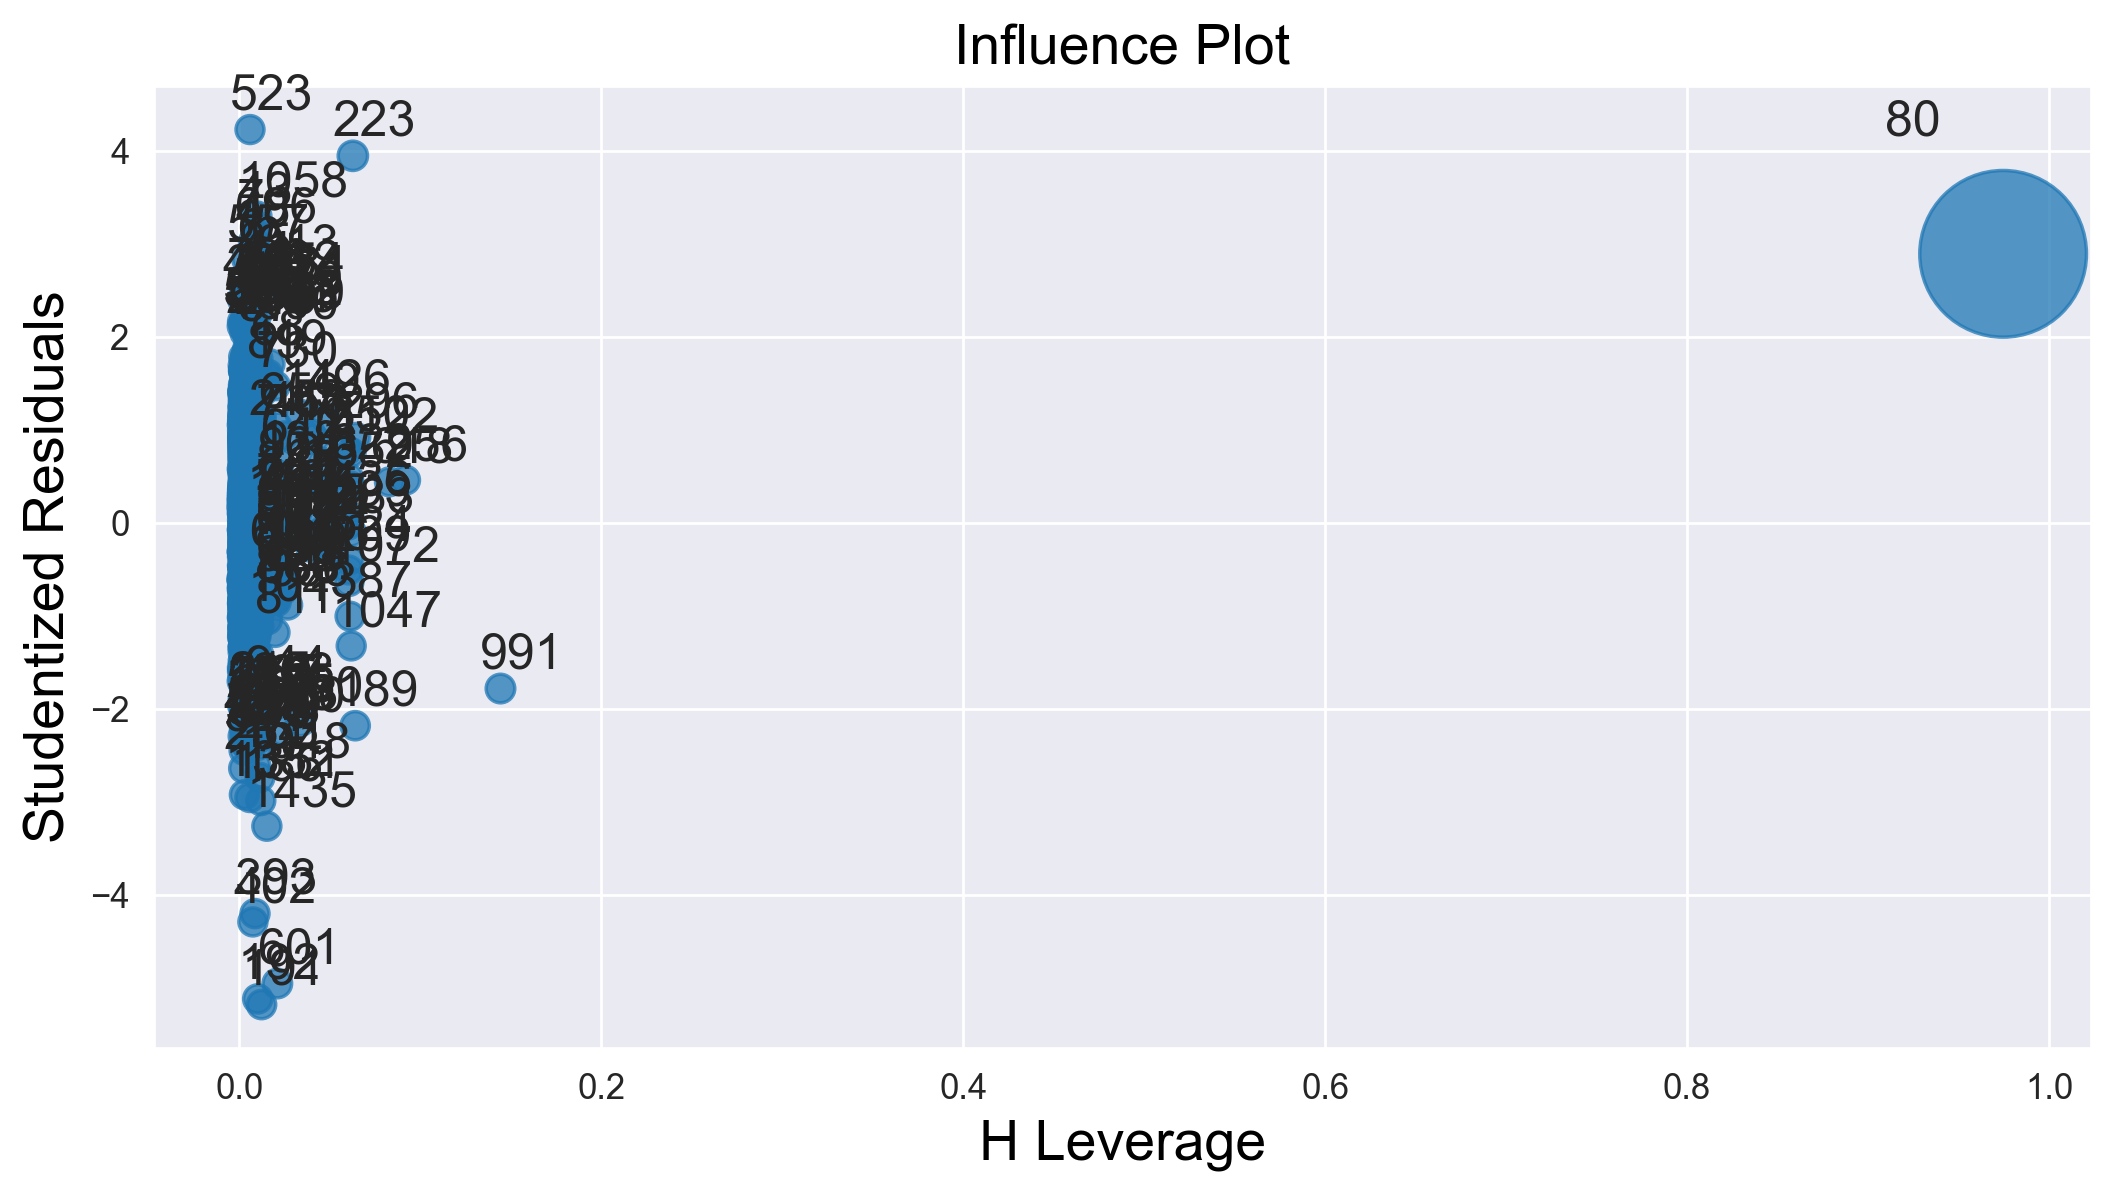

In [68]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_stats);

In [69]:
df.iloc[[80]]

,Price,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
80,17200,25,20019.0,110,16000,5,5,1152.5,0,0,1


In [70]:
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,2000,3,5,1152.5,0,1,0
1,13750,23,72937.0,90,2000,3,5,1152.5,0,1,0
2,13950,24,41711.0,90,2000,3,5,1152.5,0,1,0
3,14950,26,48000.0,90,2000,3,5,1152.5,0,1,0
4,13750,30,38500.0,90,2000,3,5,1152.5,0,1,0


#### We can clearly see huge difference in CC column at 80th record as compare to other records.
#### Therefore droping 80th row.

In [71]:
df.drop(index=80 ,inplace=True)

In [72]:
df.shape

(1434, 11)

## Improving Model 
## 2nd Model

In [73]:
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,2000,3,5,1152.5,0,1,0
1,13750,23,72937.0,90,2000,3,5,1152.5,0,1,0
2,13950,24,41711.0,90,2000,3,5,1152.5,0,1,0
3,14950,26,48000.0,90,2000,3,5,1152.5,0,1,0
4,13750,30,38500.0,90,2000,3,5,1152.5,0,1,0


In [74]:
X2 = df.iloc[:,1:]
y2 = df['Price']

In [75]:
X2

,Age,KM,HP,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986.0,90,2000,3,5,1152.5,0,1,0
1,23,72937.0,90,2000,3,5,1152.5,0,1,0
2,24,41711.0,90,2000,3,5,1152.5,0,1,0
3,26,48000.0,90,2000,3,5,1152.5,0,1,0
4,30,38500.0,90,2000,3,5,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544.0,86,1300,3,5,1025.0,0,0,1
1432,72,19000.0,86,1300,3,5,1015.0,0,0,1
1433,71,17016.0,86,1300,3,5,1015.0,0,0,1
1434,70,16916.0,86,1300,3,5,1015.0,0,0,1


In [76]:
y2

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1434, dtype: int64

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state = 42)

## Scaling the data for beter ressult

In [78]:
X_train2 = scaler.fit_transform(X_train2)

In [79]:
X_test2 = scaler.fit_transform(X_test2)

In [80]:
model2 = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [81]:
#predicting for testing data
y_pred2 = model.predict(X_test2)
y_pred2

array([13094.26540943, 11273.24339086, 10516.50270978, 11504.5939117 ,
       10999.55428158, 12835.15353046, 12386.90423283, 14839.57761669,
       10016.47038525,  9603.08811343,  9431.73015146,  7444.72438772,
        8093.66142737, 14720.04544886, 10320.0518039 , 10826.91397945,
        7551.53716129, 11269.41822615,  9210.7181303 ,  8216.93911089,
       13583.42577223, 13258.55614739,  8931.48129275, 12558.64233184,
        8706.88582861, 15480.34418148,  8052.81752339,  9470.04643286,
        9986.17441005, 10606.15145754, 12638.1296081 , 15524.01440581,
        7838.62183019,  8990.42117192,  8523.00509684, 11072.07413576,
       12348.32176323, 13000.19349177, 10154.18933329, 17811.30015546,
        7789.67756943,  8563.22387006,  8460.15640395,  9768.57280783,
        6697.84088368,  9792.6362569 ,  9219.55488876,  9881.46850406,
        8230.62914876, 10708.62131875, 11606.27594117, 15857.43487348,
        8560.71656472,  9097.40135662, 11139.90106969, 16129.83428357,
      

In [82]:
# Calculate Mean Squared Error
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

# Calculate R-squared score
r22 = r2_score(y_test2, y_pred2)
print("R-squared:", r22)

Mean Squared Error: 1230833.9843833908
R-squared: 0.8492033407484624


In [83]:
train_score2 = model.score(X_train2, y_train2)

test_score2 = model.score(X_test2, y_test2)

print(f"Training R-squared: {train_score2}")
print(f"Test R-squared: {test_score2}") 

Training R-squared: 0.8686555859551874
Test R-squared: 0.8492033407484624


## Ridge Regression 

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [85]:
ridge_regressor = Ridge()

In [86]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV = GridSearchCV(ridge_regressor, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridgeCV.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [87]:
ridgeCV.best_params_

{'alpha': 2}

In [88]:
ridgeCV.best_score_

-1205377.5394496582

In [89]:
ridge_pred = ridgeCV.predict(X_test2)
ridge_pred

array([13092.85832984, 11271.75972859, 10518.62755412, 11505.61487056,
       10999.26064165, 12831.49857423, 12383.10612812, 14830.0661922 ,
       10018.55776289,  9607.10891199,  9433.53894056,  7448.70959362,
        8095.4129927 , 14713.71421213, 10318.79054462, 10827.03973281,
        7551.65626267, 11265.15396119,  9208.87707974,  8215.80840801,
       13583.46732832, 13262.18803696,  8932.29238525, 12555.14694425,
        8712.60018275, 15472.08055707,  8057.05296628,  9471.09194759,
        9989.36187021, 10607.17548486, 12637.28780685, 15518.42568274,
        7842.79183273,  8989.49240854,  8526.77613972, 11068.52695002,
       12345.87419078, 12997.84833327, 10154.73818977, 17802.25139967,
        7787.33530007,  8567.61038841,  8458.37242833,  9767.45635913,
        6700.70337556,  9797.14601335,  9219.9917579 ,  9885.03512413,
        8232.51654632, 10708.69031781, 11603.50939155, 15849.76314039,
        8567.00406166,  9100.59880395, 11142.99958169, 16120.10544299,
      

In [90]:
mean_squared_error(y_test2, ridge_pred)

1230663.3245710453

In [91]:
r2_score(y_test2, ridge_pred)

0.849224249278692

In [92]:
print(ridgeCV.score(X_train2, y_train2))
print(ridgeCV.score(X_test2, y_test2))

-1182370.0206094244
-1230663.3245710453


## Lasso Regression 

In [93]:
from sklearn.linear_model import Lasso

In [94]:
lasso = Lasso()

In [95]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lassocv.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [96]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1205513.2549165427


In [97]:
lasso_pred = lassocv.predict(X_test2)
lasso_pred

array([13094.60085413, 11273.58756139, 10517.32681818, 11504.02041843,
       10995.20023192, 12836.33617045, 12387.85746797, 14832.00394951,
       10018.3918433 ,  9597.20992248,  9431.84492202,  7443.66426684,
        8094.46919032, 14725.33683032, 10319.79526159, 10827.04484039,
        7548.89571053, 11271.30240127,  9220.94323403,  8215.53372431,
       13586.67422308, 13258.47696091,  8927.27145103, 12560.9934495 ,
        8706.71251711, 15473.23743022,  8052.00190936,  9470.09553292,
        9987.259986  , 10602.58155974, 12638.1340364 , 15521.3228784 ,
        7839.24187935,  8984.32363788,  8521.44721104, 11074.73038919,
       12351.84542431, 13002.96046261, 10150.30838469, 17807.31952335,
        7787.07756048,  8564.31798365,  8456.43534977,  9778.06586947,
        6704.12661727,  9792.23809727,  9218.29275724,  9882.76121121,
        8228.79886531, 10705.07395285, 11602.93386007, 15849.11275958,
        8561.0287672 ,  9101.79601352, 11141.72187727, 16123.07752824,
      

In [98]:
r2_score(y_test2, lasso_pred)

0.8490197347963333